In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# Loading the excel file
data1= pd.read_excel('innercity.xlsx')

In [3]:
pd.options.display.max_columns = None

In [4]:
data1.head()

cid         dayhours     price  room_bed  room_bath  \
0  3.876101e+09  20150427T000000  600000.0       4.0       1.75   
1  3.145600e+09  20150317T000000  190000.0       2.0       1.00   
2  7.129303e+09  20140820T000000  735000.0       4.0       2.75   
3  7.338220e+09  20141010T000000  257000.0       3.0       2.50   
4  7.950301e+09  20150218T000000  450000.0       2.0       1.00   

   living_measure  lot_measure ceil coast  sight condition  quality  \
0          3050.0       9440.0  1.0   0.0    0.0       3.0      8.0   
1           670.0       3101.0  1.0   0.0    0.0       4.0      6.0   
2          3040.0       2415.0  2.0   1.0    4.0       3.0      8.0   
3          1740.0       3721.0  2.0   0.0    0.0       3.0      8.0   
4          1120.0       4590.0  1.0   0.0    0.0       3.0      7.0   

   ceil_measure  basement yr_built  yr_renovated  zipcode      lat     long  \
0        1800.0    1250.0   1966.0           0.0  98034.0  47.7228 -122.183   
1         670.0       0.0   1948.0           0.0  98118.0  47.5546 -122.274   
2        3040.0       0.0   1966.0           0.0  98118.0  47.5188 -122.256   
3        1740.0       0.0   2009.0           0.0  98002.0  47.3363 -122.213   
4        1120.0       0.0   1924.0           0.0  98118.0  47.5663 -122.285   

   living_measure15  lot_measure15  furnished total_area  
0            2020.0         8660.0        0.0    12490.0  
1            1660.0         4100.0        0.0     3771.0  
2            2620.0         2433.0        0.0     5455.0  
3            2030.0         3794.0        0.0     5461.0  
4            1120.0         5100.0        0.0     5710.0

In [5]:
data1.tail()

cid         dayhours      price  room_bed  room_bath  \
21608  2.036006e+08  20150310T000000   685530.0       4.0       2.50   
21609  6.250493e+08  20140521T000000   535000.0       2.0       1.00   
21610  4.240690e+08  20140905T000000   998000.0       3.0       3.75   
21611  7.258200e+09  20150206T000000   262000.0       4.0       2.50   
21612  8.805900e+09  20141229T000000  1150000.0       4.0       2.50   

       living_measure  lot_measure ceil coast  sight condition  quality  \
21608          3130.0      60467.0  2.0   0.0    0.0       3.0      9.0   
21609          1030.0       4841.0  1.0   0.0    0.0       3.0      7.0   
21610          3710.0      34412.0  2.0   0.0    0.0       3.0     10.0   
21611          1560.0       7800.0  2.0   0.0    0.0       3.0      7.0   
21612          1940.0       4875.0  2.0   0.0    0.0       4.0      9.0   

       ceil_measure  basement yr_built  yr_renovated  zipcode      lat  \
21608        3130.0       0.0   1996.0           0.0  98014.0  47.6618   
21609         920.0     110.0   1939.0           0.0  98103.0  47.6860   
21610        2910.0     800.0   1978.0           0.0  98075.0  47.5888   
21611        1560.0       0.0   1997.0           0.0  98168.0  47.5140   
21612        1940.0       0.0   1925.0           0.0  98112.0  47.6427   

          long  living_measure15  lot_measure15  furnished total_area  
21608 -121.962            2780.0        44224.0        1.0    63597.0  
21609 -122.341            1530.0         4944.0        0.0     5871.0  
21610  -122.04            2390.0        34412.0        1.0    38122.0  
21611 -122.316            1160.0         7800.0        0.0     9360.0  
21612 -122.304            1790.0         4875.0        1.0     6815.0

In [6]:
# Checking the shape of the dataset(no. of rows and columns)
data1.shape

(21613, 23)

In [7]:
# Shape of the dataframe
print("no. of rows: ",data1.shape[0], "\n""no. of columns: ",data1.shape[1])

no. of rows:  21613 
no. of columns:  23


The dataset has 21613 entries with 23 features

In [8]:
# Checking the basic info about the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  float64
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  float64
 16  zipcode           21613 non-null  float6

In [9]:
data1.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [10]:
data1.describe(percentiles=[.25,0.50,0.75,0.90]).T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21505.0  3.371355e+00  9.302886e-01  0.000000e+00   
room_bath         21505.0  2.115171e+00  7.702481e-01  0.000000e+00   
living_measure    21596.0  2.079861e+03  9.184961e+02  2.900000e+02   
lot_measure       21571.0  1.510458e+04  4.142362e+04  5.200000e+02   
sight             21556.0  2.343663e-01  7.664376e-01  0.000000e+00   
quality           21612.0  7.656857e+00  1.175484e+00  1.000000e+00   
ceil_measure      21612.0  1.788367e+03  8.281025e+02  2.900000e+02   
basement          21612.0  2.915225e+02  4.425808e+02  0.000000e+00   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
living_measure15  21447.0  1.987066e+03  6.855196e+02  3.990000e+02   
lot_measure15     21584.0  1.276654e+04  2.728699e+04  6.510000e+02   
furnished         21584.0  1.967198e-01  3.975279e-01  0.000000e+00   

                           25%           50%           75%           90%  \
cid               2.123049e+09  3.904930e+09  7.308900e+09  8.732028e+09   
price             3.219500e+05  4.500000e+05  6.450000e+05  8.870000e+05   
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  4.000000e+00   
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  3.000000e+00   
living_measure    1.429250e+03  1.910000e+03  2.550000e+03  3.250000e+03   
lot_measure       5.040000e+03  7.618000e+03  1.068450e+04  2.137500e+04   
sight             0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
quality           7.000000e+00  7.000000e+00  8.000000e+00  9.000000e+00   
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  2.950000e+03   
basement          0.000000e+00  0.000000e+00  5.600000e+02  9.700000e+02   
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.815500e+04   
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.772790e+01   
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  2.930000e+03   
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  1.785300e+04   
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   

                           max  
cid               9.900000e+09  
price             7.700000e+06  
room_bed          3.300000e+01  
room_bath         8.000000e+00  
living_measure    1.354000e+04  
lot_measure       1.651359e+06  
sight             4.000000e+00  
quality           1.300000e+01  
ceil_measure      9.410000e+03  
basement          4.820000e+03  
yr_renovated      2.015000e+03  
zipcode           9.819900e+04  
lat               4.777760e+01  
living_measure15  6.210000e+03  
lot_measure15     8.712000e+05  
furnished         1.000000e+00

In [11]:
data1.describe(include='object').T

count unique              top     freq
dayhours      21613    372  20140623T000000      142
ceil        21571.0    7.0              1.0  10647.0
coast       21612.0    3.0              0.0  21421.0
condition   21556.0    6.0              3.0  13978.0
yr_built    21612.0  117.0           2014.0    559.0
long        21613.0  753.0          -122.29    116.0
total_area    21584  11145                $       39

In [12]:
#Check for missing value in any column
data1.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

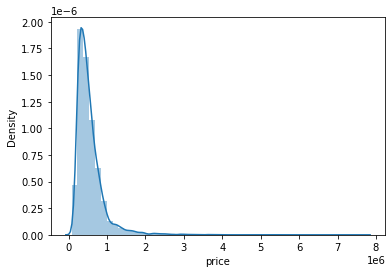

In [13]:

sns.distplot(data1['price'])

<AxesSubplot:xlabel='room_bed', ylabel='count'>

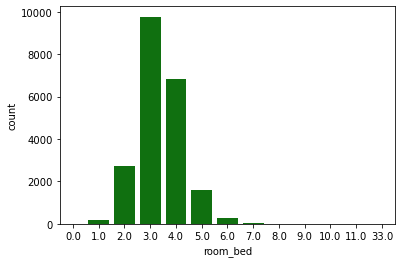

In [14]:
sns.countplot(data1.room_bed,color='green')

<AxesSubplot:xlabel='ceil', ylabel='count'>

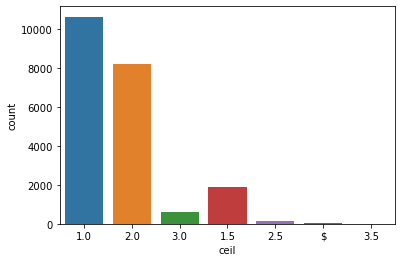

In [15]:
sns.countplot('ceil',data=data1)

<AxesSubplot:xlabel='furnished', ylabel='count'>

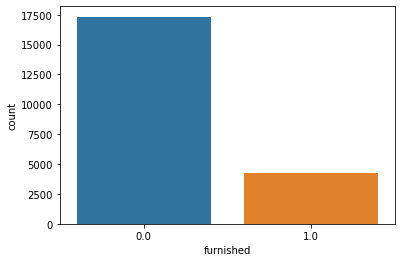

In [16]:
sns.countplot('furnished',data=data1)

In [17]:
### Examine missing values
data_na = data1.isna().sum()
data_na[data_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values
#total 689 missing values. that is of 3.18 percentage

living_measure15    166
room_bed            108
room_bath           108
sight                57
condition            57
lot_measure          42
ceil                 42
lot_measure15        29
furnished            29
total_area           29
living_measure       17
coast                 1
quality               1
ceil_measure          1
basement              1
yr_built              1
dtype: int64

In [18]:
data1.dtypes

cid                 float64
dayhours             object
price               float64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated        float64
zipcode             float64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [19]:
data1.skew()

cid                  0.243329
price                4.021716
room_bed             1.980749
room_bath            0.511689
living_measure       1.472565
lot_measure         13.072364
sight                3.395181
quality              0.771129
ceil_measure         1.446747
basement             1.577898
yr_renovated         4.549493
zipcode              0.405661
lat                 -0.485270
living_measure15     1.107979
lot_measure15        9.519083
furnished            1.525972
dtype: float64

In [20]:
dups = data1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data1[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [cid, dayhours, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

In [21]:
data=data1.copy()

In [22]:
data.head()

cid         dayhours     price  room_bed  room_bath  \
0  3.876101e+09  20150427T000000  600000.0       4.0       1.75   
1  3.145600e+09  20150317T000000  190000.0       2.0       1.00   
2  7.129303e+09  20140820T000000  735000.0       4.0       2.75   
3  7.338220e+09  20141010T000000  257000.0       3.0       2.50   
4  7.950301e+09  20150218T000000  450000.0       2.0       1.00   

   living_measure  lot_measure ceil coast  sight condition  quality  \
0          3050.0       9440.0  1.0   0.0    0.0       3.0      8.0   
1           670.0       3101.0  1.0   0.0    0.0       4.0      6.0   
2          3040.0       2415.0  2.0   1.0    4.0       3.0      8.0   
3          1740.0       3721.0  2.0   0.0    0.0       3.0      8.0   
4          1120.0       4590.0  1.0   0.0    0.0       3.0      7.0   

   ceil_measure  basement yr_built  yr_renovated  zipcode      lat     long  \
0        1800.0    1250.0   1966.0           0.0  98034.0  47.7228 -122.183   
1         670.0       0.0   1948.0           0.0  98118.0  47.5546 -122.274   
2        3040.0       0.0   1966.0           0.0  98118.0  47.5188 -122.256   
3        1740.0       0.0   2009.0           0.0  98002.0  47.3363 -122.213   
4        1120.0       0.0   1924.0           0.0  98118.0  47.5663 -122.285   

   living_measure15  lot_measure15  furnished total_area  
0            2020.0         8660.0        0.0    12490.0  
1            1660.0         4100.0        0.0     3771.0  
2            2620.0         2433.0        0.0     5455.0  
3            2030.0         3794.0        0.0     5461.0  
4            1120.0         5100.0        0.0     5710.0

In [23]:
data.dropna(inplace=True)
data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [24]:
data.shape

(21387, 23)

In [25]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

DAYHOURS :  372
20140830T000000      1
20150527T000000      1
20150308T000000      1
20141102T000000      1
20141130T000000      1
                  ... 
20150427T000000    125
20140708T000000    127
20140625T000000    127
20140626T000000    129
20140623T000000    141
Name: dayhours, Length: 372, dtype: int64


CEIL :  7
3.5        8
$         30
2.5      160
3.0      609
1.5     1890
2.0     8143
1.0    10547
Name: ceil, dtype: int64


COAST :  3
$         30
1.0      160
0.0    21197
Name: coast, dtype: int64


CONDITION :  5
1.0       29
2.0      171
5.0     1684
4.0     5622
3.0    13881
Name: condition, dtype: int64


YR_BUILT :  116
1934.0     21
1935.0     24
1902.0     27
1901.0     28
1933.0     29
         ... 
2003.0    415
2004.0    428
2005.0    447
2006.0    449
2014.0    554
Name: yr_built, Length: 116, dtype: int64


LONG :  753
-121.947      1
-122.499      1
-122.421      1
-122.484      1
-121.319      1
           ... 
-122.372     97
-122.291     98
-122.362    104

In [26]:
data['ceil'] = data['ceil'].replace('$',data['ceil'].mode()[0])

In [27]:
data['ceil'].value_counts() 

1.0    10577
2.0     8143
1.5     1890
3.0      609
2.5      160
3.5        8
Name: ceil, dtype: int64

In [28]:
data['coast'] = data['coast'].replace('$',data['coast'].mode()[0])

In [29]:
data['coast'].value_counts()

0.0    21227
1.0      160
Name: coast, dtype: int64

In [30]:
data['total_area'] = data['total_area'].replace('$',0)

In [31]:
data['total_area'] = data['total_area'].replace(0,data['total_area'].mean())

In [32]:
data['total_area'].value_counts()

17167.491841    39
7330.000000     19
6770.000000     19
9820.000000     19
9060.000000     19
                ..
9489.000000      1
38062.000000     1
2182.000000      1
3958.000000      1
38122.000000     1
Name: total_area, Length: 11094, dtype: int64

In [33]:
data["total_area"] = data["total_area"].astype("int")

In [34]:
data['total_area'].fillna(0,inplace=True)

In [35]:
data['total_area'].dtype

dtype('int32')

In [36]:
data['long'] = data['long'].replace('$',0)

In [37]:
data['long'] = data['long'].replace(0,data['long'].mean())

In [38]:
data.long.dtype

dtype('float64')

In [39]:
data['dayhours']= [x.strip().replace('T000000','') for x in data.dayhours]

In [40]:
data['dayhours'] = pd.to_datetime(data.dayhours)

In [41]:
data['year_sold'] = data.dayhours.dt.year

In [42]:
data['Age_of_house'] = data['year_sold'] - data['yr_built']

In [43]:
data.head()

cid   dayhours     price  room_bed  room_bath  living_measure  \
0  3.876101e+09 2015-04-27  600000.0       4.0       1.75          3050.0   
1  3.145600e+09 2015-03-17  190000.0       2.0       1.00           670.0   
2  7.129303e+09 2014-08-20  735000.0       4.0       2.75          3040.0   
3  7.338220e+09 2014-10-10  257000.0       3.0       2.50          1740.0   
4  7.950301e+09 2015-02-18  450000.0       2.0       1.00          1120.0   

   lot_measure  ceil  coast  sight condition  quality  ceil_measure  basement  \
0       9440.0   1.0    0.0    0.0       3.0      8.0        1800.0    1250.0   
1       3101.0   1.0    0.0    0.0       4.0      6.0         670.0       0.0   
2       2415.0   2.0    1.0    4.0       3.0      8.0        3040.0       0.0   
3       3721.0   2.0    0.0    0.0       3.0      8.0        1740.0       0.0   
4       4590.0   1.0    0.0    0.0       3.0      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0   1966.0           0.0  98034.0  47.7228 -122.183            2020.0   
1   1948.0           0.0  98118.0  47.5546 -122.274            1660.0   
2   1966.0           0.0  98118.0  47.5188 -122.256            2620.0   
3   2009.0           0.0  98002.0  47.3363 -122.213            2030.0   
4   1924.0           0.0  98118.0  47.5663 -122.285            1120.0   

   lot_measure15  furnished  total_area  year_sold Age_of_house  
0         8660.0        0.0       12490       2015         49.0  
1         4100.0        0.0        3771       2015         67.0  
2         2433.0        0.0        5455       2014         48.0  
3         3794.0        0.0        5461       2014          5.0  
4         5100.0        0.0        5710       2015         91.0

In [44]:
data_copy=data.copy()

In [45]:
data.head()

cid   dayhours     price  room_bed  room_bath  living_measure  \
0  3.876101e+09 2015-04-27  600000.0       4.0       1.75          3050.0   
1  3.145600e+09 2015-03-17  190000.0       2.0       1.00           670.0   
2  7.129303e+09 2014-08-20  735000.0       4.0       2.75          3040.0   
3  7.338220e+09 2014-10-10  257000.0       3.0       2.50          1740.0   
4  7.950301e+09 2015-02-18  450000.0       2.0       1.00          1120.0   

   lot_measure  ceil  coast  sight condition  quality  ceil_measure  basement  \
0       9440.0   1.0    0.0    0.0       3.0      8.0        1800.0    1250.0   
1       3101.0   1.0    0.0    0.0       4.0      6.0         670.0       0.0   
2       2415.0   2.0    1.0    4.0       3.0      8.0        3040.0       0.0   
3       3721.0   2.0    0.0    0.0       3.0      8.0        1740.0       0.0   
4       4590.0   1.0    0.0    0.0       3.0      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0   1966.0           0.0  98034.0  47.7228 -122.183            2020.0   
1   1948.0           0.0  98118.0  47.5546 -122.274            1660.0   
2   1966.0           0.0  98118.0  47.5188 -122.256            2620.0   
3   2009.0           0.0  98002.0  47.3363 -122.213            2030.0   
4   1924.0           0.0  98118.0  47.5663 -122.285            1120.0   

   lot_measure15  furnished  total_area  year_sold Age_of_house  
0         8660.0        0.0       12490       2015         49.0  
1         4100.0        0.0        3771       2015         67.0  
2         2433.0        0.0        5455       2014         48.0  
3         3794.0        0.0        5461       2014          5.0  
4         5100.0        0.0        5710       2015         91.0

In [46]:
data['dayhours'].dtype

dtype('<M8[ns]')

In [47]:
data.dayhours=data.dayhours.apply(lambda x:x.strftime('%m-%y'))

In [48]:
data.rename(columns={'dayhours':'month_year'}, inplace=True)

In [49]:
data.head()

cid month_year     price  room_bed  room_bath  living_measure  \
0  3.876101e+09      04-15  600000.0       4.0       1.75          3050.0   
1  3.145600e+09      03-15  190000.0       2.0       1.00           670.0   
2  7.129303e+09      08-14  735000.0       4.0       2.75          3040.0   
3  7.338220e+09      10-14  257000.0       3.0       2.50          1740.0   
4  7.950301e+09      02-15  450000.0       2.0       1.00          1120.0   

   lot_measure  ceil  coast  sight condition  quality  ceil_measure  basement  \
0       9440.0   1.0    0.0    0.0       3.0      8.0        1800.0    1250.0   
1       3101.0   1.0    0.0    0.0       4.0      6.0         670.0       0.0   
2       2415.0   2.0    1.0    4.0       3.0      8.0        3040.0       0.0   
3       3721.0   2.0    0.0    0.0       3.0      8.0        1740.0       0.0   
4       4590.0   1.0    0.0    0.0       3.0      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0   1966.0           0.0  98034.0  47.7228 -122.183            2020.0   
1   1948.0           0.0  98118.0  47.5546 -122.274            1660.0   
2   1966.0           0.0  98118.0  47.5188 -122.256            2620.0   
3   2009.0           0.0  98002.0  47.3363 -122.213            2030.0   
4   1924.0           0.0  98118.0  47.5663 -122.285            1120.0   

   lot_measure15  furnished  total_area  year_sold Age_of_house  
0         8660.0        0.0       12490       2015         49.0  
1         4100.0        0.0        3771       2015         67.0  
2         2433.0        0.0        5455       2014         48.0  
3         3794.0        0.0        5461       2014          5.0  
4         5100.0        0.0        5710       2015         91.0

In [50]:
data['month_year'].value_counts()

04-15    2203
07-14    2189
06-14    2156
08-14    1921
03-15    1857
10-14    1852
05-14    1758
09-14    1749
12-14    1459
11-14    1396
02-15    1241
01-15     967
05-15     639
Name: month_year, dtype: int64

In [51]:
data.groupby(['month_year'])['price'].agg('mean')

month_year
01-15    526209.472596
02-15    507594.664786
03-15    545165.102854
04-15    561477.873808
05-14    548163.310011
05-15    556905.774648
06-14    558951.699907
07-14    543918.612608
08-14    536838.082769
09-14    530156.746712
10-14    539998.354752
11-14    521645.482808
12-14    525261.450308
Name: price, dtype: float64

In [52]:
data=data.drop(columns = 'cid')

In [53]:
data.head()

month_year     price  room_bed  room_bath  living_measure  lot_measure  \
0      04-15  600000.0       4.0       1.75          3050.0       9440.0   
1      03-15  190000.0       2.0       1.00           670.0       3101.0   
2      08-14  735000.0       4.0       2.75          3040.0       2415.0   
3      10-14  257000.0       3.0       2.50          1740.0       3721.0   
4      02-15  450000.0       2.0       1.00          1120.0       4590.0   

   ceil  coast  sight condition  quality  ceil_measure  basement yr_built  \
0   1.0    0.0    0.0       3.0      8.0        1800.0    1250.0   1966.0   
1   1.0    0.0    0.0       4.0      6.0         670.0       0.0   1948.0   
2   2.0    1.0    4.0       3.0      8.0        3040.0       0.0   1966.0   
3   2.0    0.0    0.0       3.0      8.0        1740.0       0.0   2009.0   
4   1.0    0.0    0.0       3.0      7.0        1120.0       0.0   1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

   furnished  total_area  year_sold Age_of_house  
0        0.0       12490       2015         49.0  
1        0.0        3771       2015         67.0  
2        0.0        5455       2014         48.0  
3        0.0        5461       2014          5.0  
4        0.0        5710       2015         91.0

In [54]:
data1=data.copy()
data1.head()
# for uni and multi variate analysis

month_year     price  room_bed  room_bath  living_measure  lot_measure  \
0      04-15  600000.0       4.0       1.75          3050.0       9440.0   
1      03-15  190000.0       2.0       1.00           670.0       3101.0   
2      08-14  735000.0       4.0       2.75          3040.0       2415.0   
3      10-14  257000.0       3.0       2.50          1740.0       3721.0   
4      02-15  450000.0       2.0       1.00          1120.0       4590.0   

   ceil  coast  sight condition  quality  ceil_measure  basement yr_built  \
0   1.0    0.0    0.0       3.0      8.0        1800.0    1250.0   1966.0   
1   1.0    0.0    0.0       4.0      6.0         670.0       0.0   1948.0   
2   2.0    1.0    4.0       3.0      8.0        3040.0       0.0   1966.0   
3   2.0    0.0    0.0       3.0      8.0        1740.0       0.0   2009.0   
4   1.0    0.0    0.0       3.0      7.0        1120.0       0.0   1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

   furnished  total_area  year_sold Age_of_house  
0        0.0       12490       2015         49.0  
1        0.0        3771       2015         67.0  
2        0.0        5455       2014         48.0  
3        0.0        5461       2014          5.0  
4        0.0        5710       2015         91.0

wait

In [57]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Histogram of price'}, xlabel='price', ylabel='Density'>

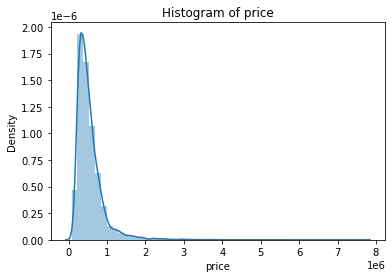

In [59]:
plt.title('Histogram of price')
sns.distplot((data1['price']), kde=True)

In [65]:
data1['room_bed'].value_counts()

3.0     9721
4.0     6810
2.0     2731
5.0     1585
6.0      268
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

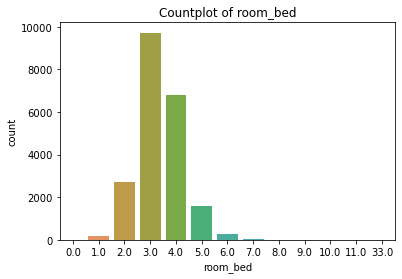

In [64]:
plt.title('Countplot of room_bed');
sns.countplot(data1['room_bed']);

In [66]:
data1['room_bath'].value_counts()

2.50    5330
1.00    3807
1.75    3013
2.25    2030
2.00    1909
1.50    1431
2.75    1171
3.00     743
3.50     723
3.25     584
3.75     155
4.00     135
4.50      98
4.25      78
0.75      72
4.75      22
5.00      21
5.25      12
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

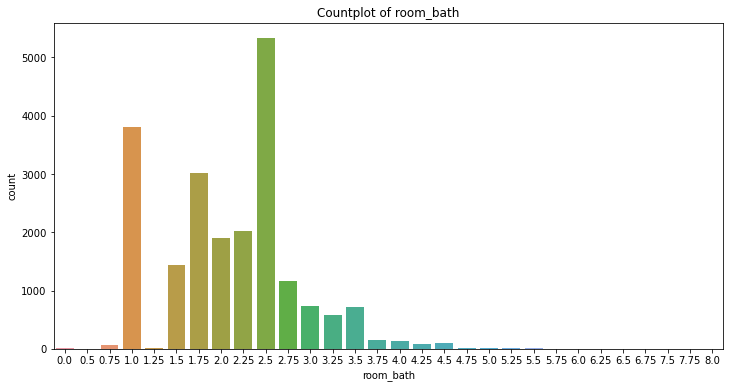

In [68]:
plt.figure(figsize=(12,6))
plt.title('Countplot of room_bath');
sns.countplot(data1['room_bath']);

<AxesSubplot:title={'center':'Histogram of living_measure'}, xlabel='living_measure', ylabel='Density'>

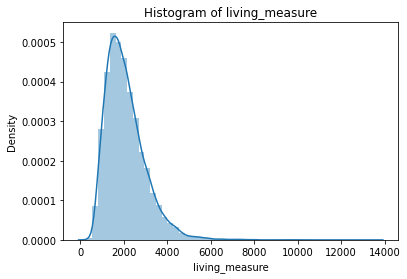

In [69]:
plt.title('Histogram of living_measure')
sns.distplot((data1['living_measure']), kde=True)

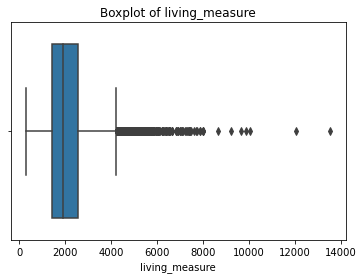

In [72]:
plt.title('Boxplot of living_measure')
sns.boxplot(data1['living_measure']);

<AxesSubplot:title={'center':'Histogram of lot_measure'}, xlabel='lot_measure', ylabel='Density'>

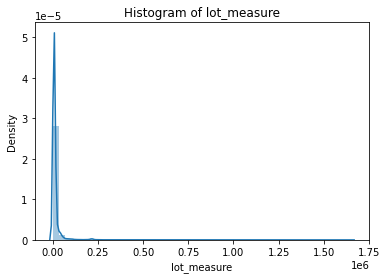

In [73]:
plt.title('Histogram of lot_measure')
sns.distplot((data1['lot_measure']), kde=True)

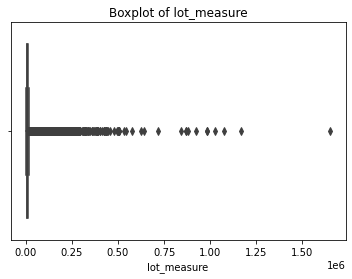

In [74]:
plt.title('Boxplot of lot_measure')
sns.boxplot(data1['lot_measure']);

In [75]:
data1['ceil'].value_counts()

1.0    10577
2.0     8143
1.5     1890
3.0      609
2.5      160
3.5        8
Name: ceil, dtype: int64

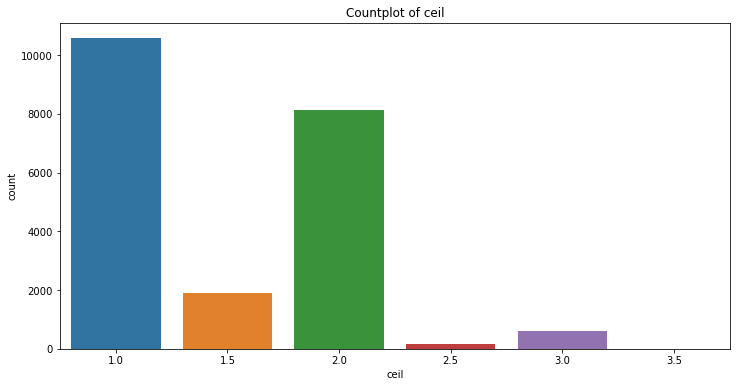

In [76]:
plt.figure(figsize=(12,6))
plt.title('Countplot of ceil');
sns.countplot(data1['ceil']);

In [78]:
data1['coast'].value_counts()

0.0    21227
1.0      160
Name: coast, dtype: int64

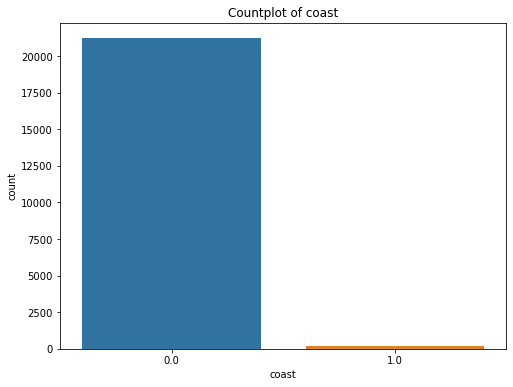

In [79]:
plt.figure(figsize=(8,6))
plt.title('Countplot of coast');
sns.countplot(data1['coast']);

In [80]:
data1['sight'].value_counts()

0.0    19280
2.0      953
3.0      506
1.0      331
4.0      317
Name: sight, dtype: int64

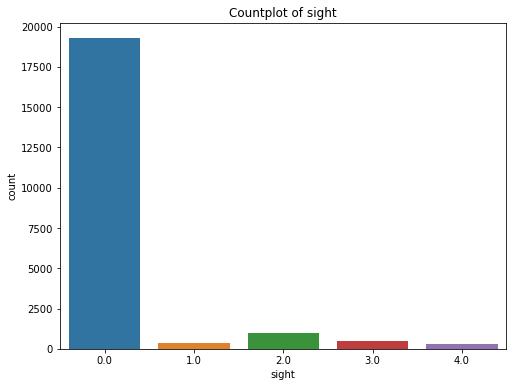

In [81]:
plt.figure(figsize=(8,6))
plt.title('Countplot of sight');
sns.countplot(data1['sight']);

In [82]:
data1['condition'].value_counts()

3.0    13881
4.0     5622
5.0     1684
2.0      171
1.0       29
Name: condition, dtype: int64

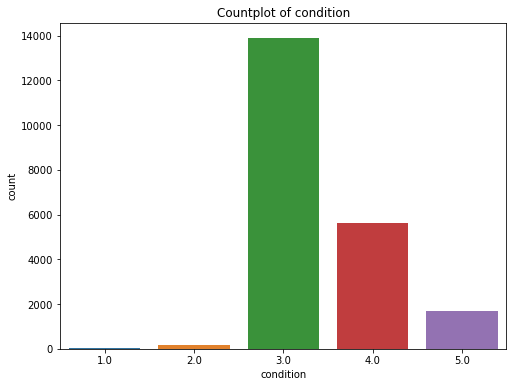

In [83]:
plt.figure(figsize=(8,6))
plt.title('Countplot of condition');
sns.countplot(data1['condition']);

In [84]:
data1['quality'].value_counts()

7.0     8879
8.0     6008
9.0     2587
6.0     2015
10.0    1127
11.0     395
5.0      240
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64

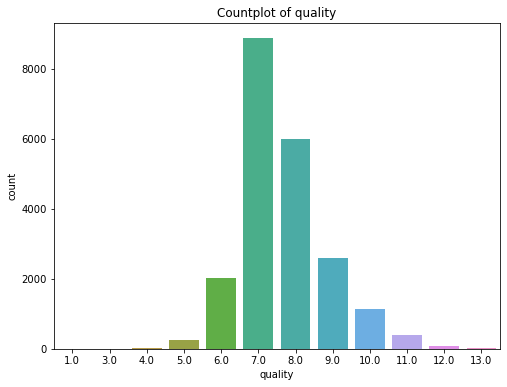

In [85]:
plt.figure(figsize=(8,6))
plt.title('Countplot of quality');
sns.countplot(data1['quality']);

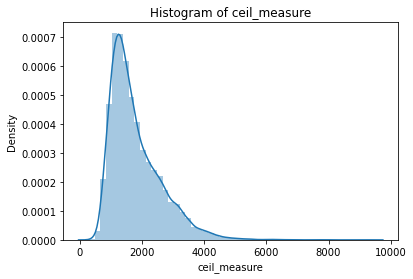

In [89]:
plt.title('Histogram of ceil_measure')
sns.distplot((data1['ceil_measure']), kde=True);

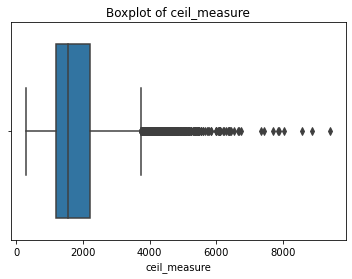

In [90]:
plt.title('Boxplot of ceil_measure')
sns.boxplot(data1['ceil_measure']);

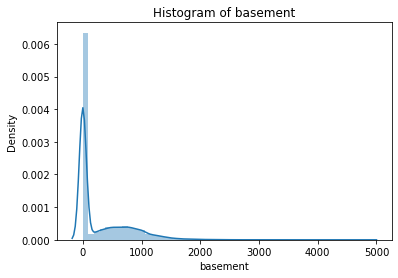

In [95]:
plt.title('Histogram of basement')
sns.distplot((data1['basement']), kde=True);

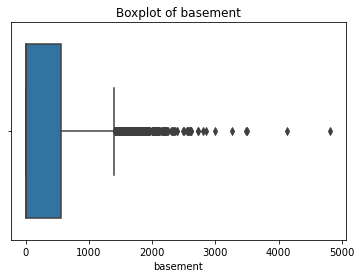

In [94]:
plt.title('Boxplot of basement')
sns.boxplot(data1['basement']);

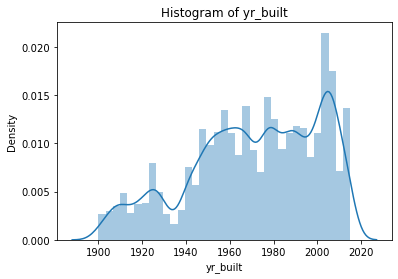

In [98]:
plt.title('Histogram of yr_built')
sns.distplot((data1['yr_built']), kde=True);

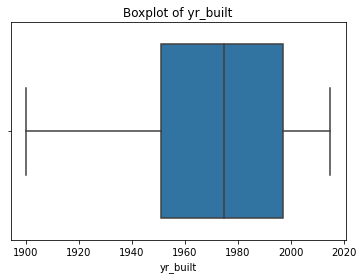

In [99]:
plt.title('Boxplot of yr_built')
sns.boxplot(data1['yr_built']);

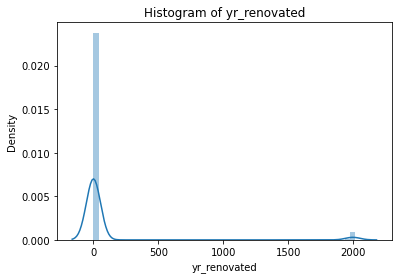

In [100]:
plt.title('Histogram of yr_renovated')
sns.distplot((data1['yr_renovated']), kde=True);

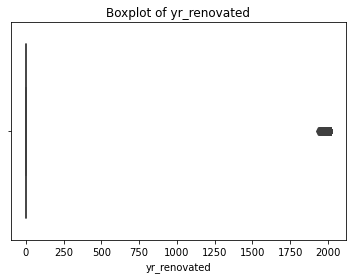

In [101]:
plt.title('Boxplot of yr_renovated')
sns.boxplot(data1['yr_renovated']);

In [102]:
data1.yr_renovated.value_counts()

0.0       20488
2014.0       89
2013.0       37
2003.0       36
2007.0       35
          ...  
1948.0        1
1959.0        1
1951.0        1
1944.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [86]:
data1['furnished'].value_counts()

0.0    17175
1.0     4212
Name: furnished, dtype: int64

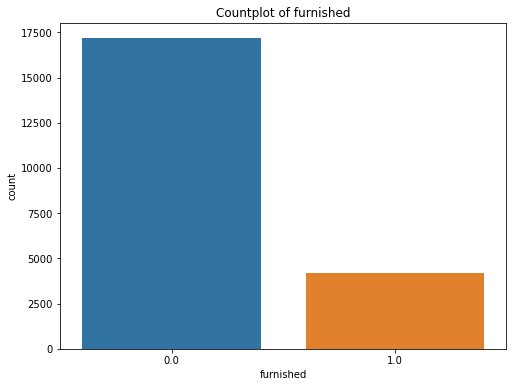

In [87]:
plt.figure(figsize=(8,6))
plt.title('Countplot of furnished');
sns.countplot(data1['furnished']);

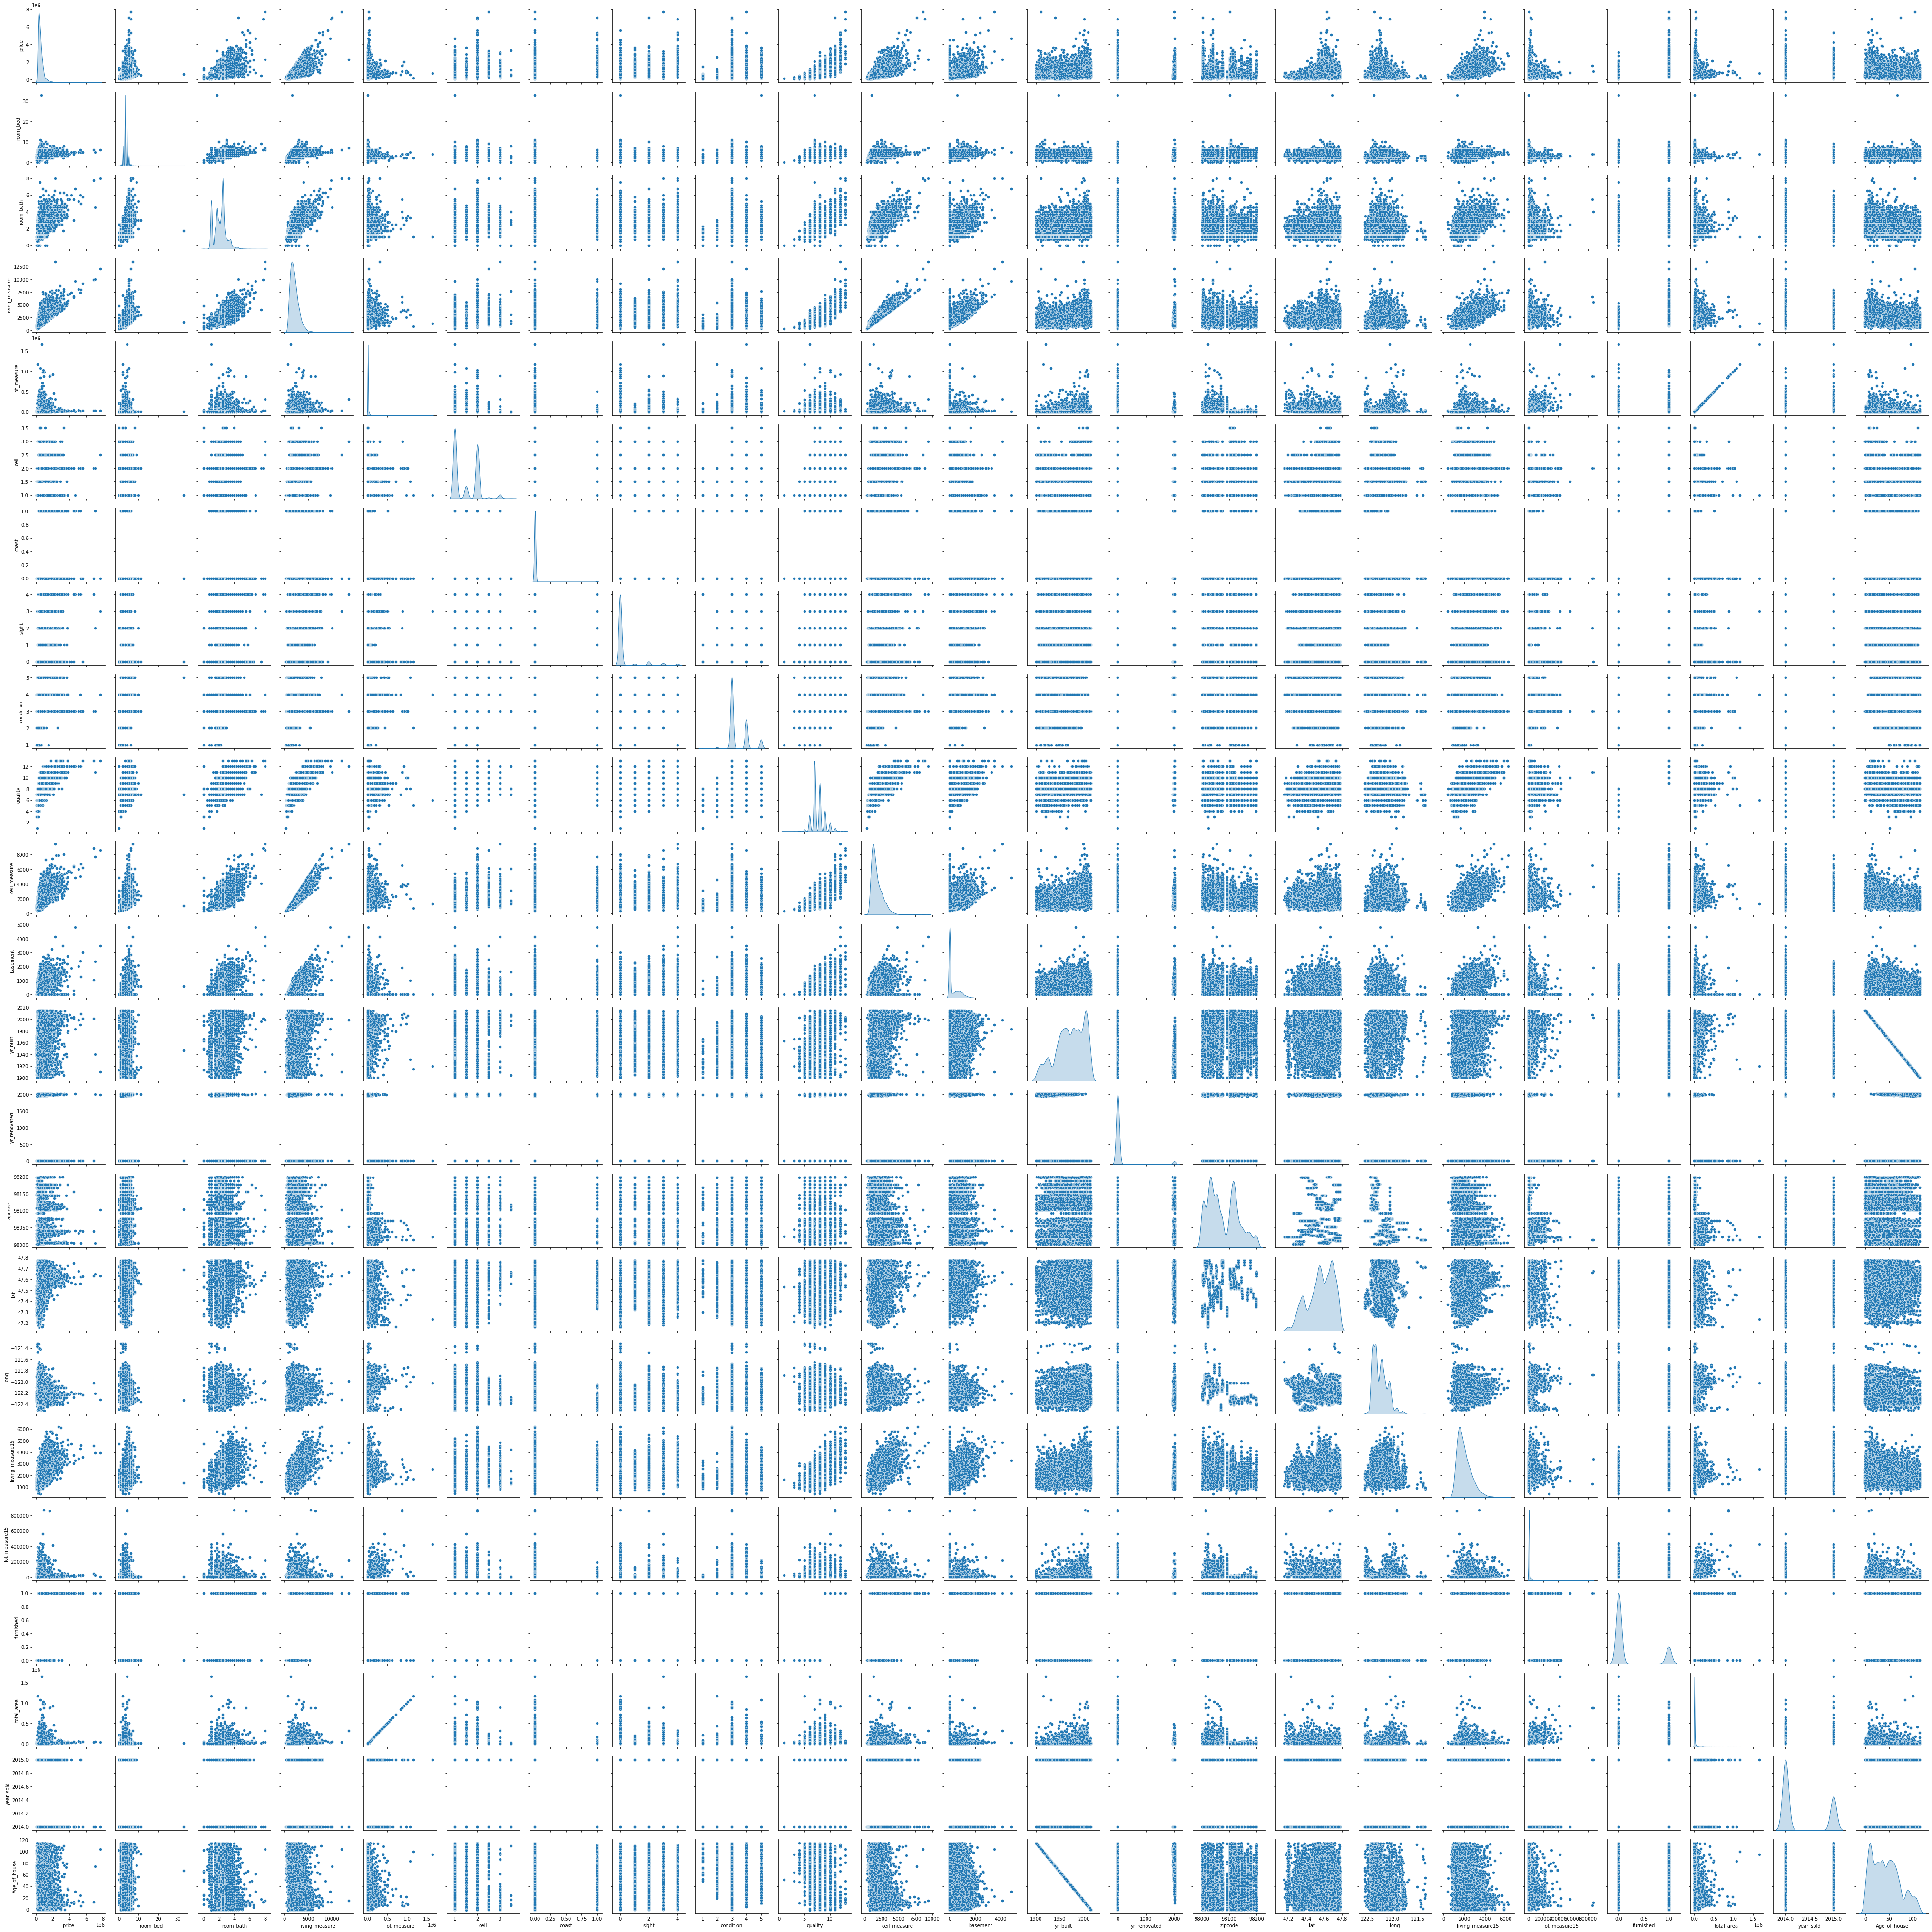

In [103]:
sns.pairplot(data=data1, diag_kind='kde')

In [104]:
#correlation matrix
data1.corr().T

price  room_bed  room_bath  living_measure  lot_measure  \
price             1.000000  0.307486   0.524946        0.702222     0.090052   
room_bed          0.307486  1.000000   0.515500        0.575881     0.032105   
room_bath         0.524946  0.515500   1.000000        0.754579     0.088038   
living_measure    0.702222  0.575881   0.754579        1.000000     0.172936   
lot_measure       0.090052  0.032105   0.088038        0.172936     1.000000   
ceil              0.255661  0.173883   0.498606        0.352303    -0.006174   
coast             0.266047 -0.006614   0.062108        0.102395     0.021365   
sight             0.397957  0.078536   0.186969        0.284800     0.073794   
quality           0.667195  0.355876   0.664890        0.762700     0.114428   
ceil_measure      0.605769  0.477350   0.685445        0.876675     0.183193   
basement          0.323870  0.301973   0.283425        0.434952     0.016100   
yr_renovated      0.126014  0.017717   0.049426        0.055083     0.008436   
zipcode          -0.053858 -0.153319  -0.205079       -0.199926    -0.130018   
lat               0.306516 -0.008975   0.024629        0.052976    -0.085400   
long              0.023099  0.130714   0.223727        0.239892     0.229169   
living_measure15  0.585217  0.390608   0.568004        0.756036     0.145626   
lot_measure15     0.082975  0.029751   0.087510        0.183696     0.715838   
furnished         0.566017  0.258765   0.484949        0.633385     0.119591   
total_area        0.105149  0.044649   0.104265        0.194189     0.999710   
year_sold         0.003186 -0.009528  -0.027038       -0.029064     0.004804   

                      ceil     coast     sight   quality  ceil_measure  \
price             0.255661  0.266047  0.397957  0.667195      0.605769   
room_bed          0.173883 -0.006614  0.078536  0.355876      0.477350   
room_bath         0.498606  0.062108  0.186969  0.664890      0.685445   
living_measure    0.352303  0.102395  0.284800  0.762700      0.876675   
lot_measure      -0.006174  0.021365  0.073794  0.114428      0.183193   
ceil              1.000000  0.024563  0.028761  0.456913      0.522421   
coast             0.024563  1.000000  0.399892  0.082439      0.071712   
sight             0.028761  0.399892  1.000000  0.251622      0.167890   
quality           0.456913  0.082439  0.251622  1.000000      0.756027   
ceil_measure      0.522421  0.071712  0.167890  0.756027      1.000000   
basement         -0.246501  0.078331  0.276956  0.168173     -0.051882   
yr_renovated      0.004338  0.089587  0.102772  0.013191      0.023221   
zipcode          -0.058678  0.030037  0.084905 -0.185248     -0.261205   
lat               0.050040 -0.014086  0.006377  0.114308     -0.000267   
long              0.123382 -0.041865 -0.077707  0.197557      0.342468   
living_measure15  0.278543  0.086090  0.281447  0.712958      0.731387   
lot_measure15    -0.012204  0.031125  0.071818  0.120294      0.193755   
furnished         0.346506  0.068889  0.220634  0.788713      0.652768   
total_area        0.001654  0.023538  0.079749  0.130587      0.201650   
year_sold        -0.022549 -0.004262  0.001799 -0.031132     -0.023735   

                  basement  yr_renovated   zipcode       lat      long  \
price             0.323870      0.126014 -0.053858  0.306516  0.023099   
room_bed          0.301973      0.017717 -0.153319 -0.008975  0.130714   
room_bath         0.283425      0.049426 -0.205079  0.024629  0.223727   
living_measure    0.434952      0.055083 -0.199926  0.052976  0.239892   
lot_measure       0.016100      0.008436 -0.130018 -0.085400  0.229169   
ceil             -0.246501      0.004338 -0.058678  0.050040  0.123382   
coast             0.078331      0.089587  0.030037 -0.014086 -0.041865   
sight             0.276956      0.102772  0.084905  0.006377 -0.077707   
quality           0.168173      0.013191 -0.185248  0.114308  0.197557   
ceil_measure     -0.051882      0.023221 -0.2

In [107]:
data1.corr()['price']

price               1.000000
room_bed            0.307486
room_bath           0.524946
living_measure      0.702222
lot_measure         0.090052
ceil                0.255661
coast               0.266047
sight               0.397957
quality             0.667195
ceil_measure        0.605769
basement            0.323870
yr_renovated        0.126014
zipcode            -0.053858
lat                 0.306516
long                0.023099
living_measure15    0.585217
lot_measure15       0.082975
furnished           0.566017
total_area          0.105149
year_sold           0.003186
Name: price, dtype: float64

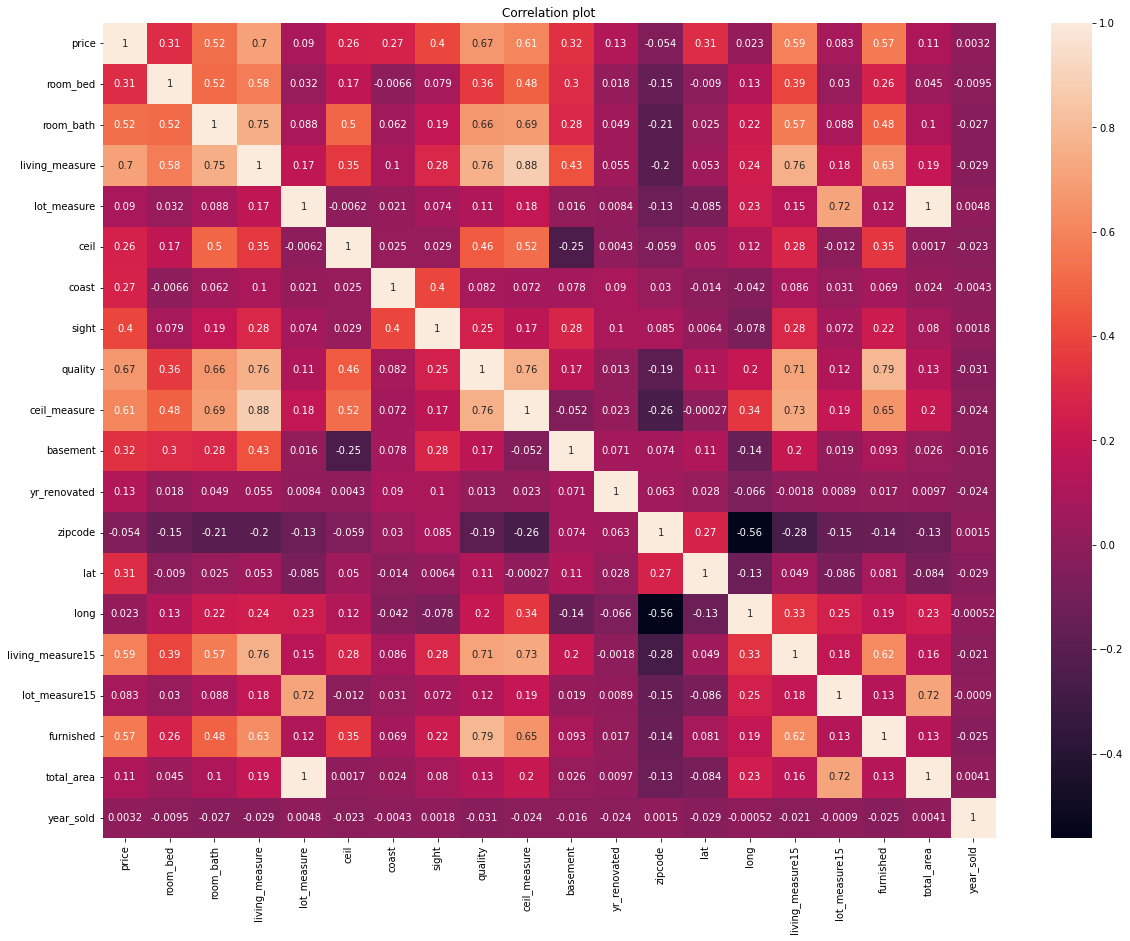

In [105]:
cor=data1.corr()
plt.figure(figsize=(20,15))
plt.title('Correlation plot')
sns.heatmap(cor,annot = True)
plt.show()

In [55]:
data[data['room_bed'] == 33].index

Int64Index([16913], dtype='int64')

In [56]:
data['room_bed']=data['room_bed'].astype('category')

In [57]:
data.drop(index=16913,inplace=True)

In [58]:
data = data.reset_index()
data.drop(columns='index',inplace=True)

In [59]:
data.dtypes

month_year            object
price                float64
room_bed            category
room_bath            float64
living_measure       float64
lot_measure          float64
ceil                 float64
coast                float64
sight                float64
condition             object
quality              float64
ceil_measure         float64
basement             float64
yr_built              object
yr_renovated         float64
zipcode              float64
lat                  float64
long                 float64
living_measure15     float64
lot_measure15        float64
furnished            float64
total_area             int32
year_sold              int64
Age_of_house          object
dtype: object

In [60]:
data['room_bath']=data['room_bath'].astype('category')
data['ceil']=data['ceil'].astype('category')
data['coast']=data['coast'].astype('category')
data['sight']=data['sight'].astype('category')
data['condition']=data['condition'].astype('category')
data['quality']=data['quality'].astype('category')

In [61]:
data.dtypes

month_year            object
price                float64
room_bed            category
room_bath           category
living_measure       float64
lot_measure          float64
ceil                category
coast               category
sight               category
condition           category
quality             category
ceil_measure         float64
basement             float64
yr_built              object
yr_renovated         float64
zipcode              float64
lat                  float64
long                 float64
living_measure15     float64
lot_measure15        float64
furnished            float64
total_area             int32
year_sold              int64
Age_of_house          object
dtype: object

In [62]:
data.basement

0        1250.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
21381       0.0
21382     110.0
21383     800.0
21384       0.0
21385       0.0
Name: basement, Length: 21386, dtype: float64

In [63]:
data['have_basement'] = data['basement'].apply(lambda x: 0 if x==0 else 1)

In [64]:
data['Is_renovated'] = data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [65]:
data['has_furnished'] = data['furnished'].apply(lambda x: 0 if x==0 else 1)

In [66]:
data.head()

month_year     price room_bed room_bath  living_measure  lot_measure ceil  \
0      04-15  600000.0      4.0      1.75          3050.0       9440.0  1.0   
1      03-15  190000.0      2.0      1.00           670.0       3101.0  1.0   
2      08-14  735000.0      4.0      2.75          3040.0       2415.0  2.0   
3      10-14  257000.0      3.0      2.50          1740.0       3721.0  2.0   
4      02-15  450000.0      2.0      1.00          1120.0       4590.0  1.0   

  coast sight condition quality  ceil_measure  basement yr_built  \
0   0.0   0.0       3.0     8.0        1800.0    1250.0   1966.0   
1   0.0   0.0       4.0     6.0         670.0       0.0   1948.0   
2   1.0   4.0       3.0     8.0        3040.0       0.0   1966.0   
3   0.0   0.0       3.0     8.0        1740.0       0.0   2009.0   
4   0.0   0.0       3.0     7.0        1120.0       0.0   1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

   furnished  total_area  year_sold Age_of_house  have_basement  Is_renovated  \
0        0.0       12490       2015         49.0              1             0   
1        0.0        3771       2015         67.0              0             0   
2        0.0        5455       2014         48.0              0             0   
3        0.0        5461       2014          5.0              0             0   
4        0.0        5710       2015         91.0              0             0   

   has_furnished  
0              0  
1              0  
2              0  
3              0  
4              0

In [67]:
data=data.drop(columns='basement')

In [68]:
data=data.drop(columns='yr_renovated')

In [72]:
data=data.drop(columns='furnished')

In [ ]:
data.head()

In [ ]:
sns.pairplot(data=data, diag_kind='kde')

In [69]:
data=data.drop(columns='zipcode')

In [70]:
data=data.drop(columns='long')

In [71]:
data=data.drop(columns='lat')

In [73]:
data.head()

month_year     price room_bed room_bath  living_measure  lot_measure ceil  \
0      04-15  600000.0      4.0      1.75          3050.0       9440.0  1.0   
1      03-15  190000.0      2.0      1.00           670.0       3101.0  1.0   
2      08-14  735000.0      4.0      2.75          3040.0       2415.0  2.0   
3      10-14  257000.0      3.0      2.50          1740.0       3721.0  2.0   
4      02-15  450000.0      2.0      1.00          1120.0       4590.0  1.0   

  coast sight condition quality  ceil_measure yr_built  living_measure15  \
0   0.0   0.0       3.0     8.0        1800.0   1966.0            2020.0   
1   0.0   0.0       4.0     6.0         670.0   1948.0            1660.0   
2   1.0   4.0       3.0     8.0        3040.0   1966.0            2620.0   
3   0.0   0.0       3.0     8.0        1740.0   2009.0            2030.0   
4   0.0   0.0       3.0     7.0        1120.0   1924.0            1120.0   

   lot_measure15  total_area  year_sold Age_of_house  have_basement  \
0         8660.0       12490       2015         49.0              1   
1         4100.0        3771       2015         67.0              0   
2         2433.0        5455       2014         48.0              0   
3         3794.0        5461       2014          5.0              0   
4         5100.0        5710       2015         91.0              0   

   Is_renovated  has_furnished  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

In [74]:
data.shape

(21386, 21)

In [75]:
data.dtypes

month_year            object
price                float64
room_bed            category
room_bath           category
living_measure       float64
lot_measure          float64
ceil                category
coast               category
sight               category
condition           category
quality             category
ceil_measure         float64
yr_built              object
living_measure15     float64
lot_measure15        float64
total_area             int32
year_sold              int64
Age_of_house          object
have_basement          int64
Is_renovated           int64
has_furnished          int64
dtype: object

In [76]:
data['yr_built']=data['yr_built'].astype('float64')
data['Age_of_house']=data['Age_of_house'].astype('float64')
data['have_basement']=data['have_basement'].astype('category')
data['Is_renovated']=data['Is_renovated'].astype('category')
data['has_furnished']=data['has_furnished'].astype('category')

In [77]:
data.dtypes

month_year            object
price                float64
room_bed            category
room_bath           category
living_measure       float64
lot_measure          float64
ceil                category
coast               category
sight               category
condition           category
quality             category
ceil_measure         float64
yr_built             float64
living_measure15     float64
lot_measure15        float64
total_area             int32
year_sold              int64
Age_of_house         float64
have_basement       category
Is_renovated        category
has_furnished       category
dtype: object

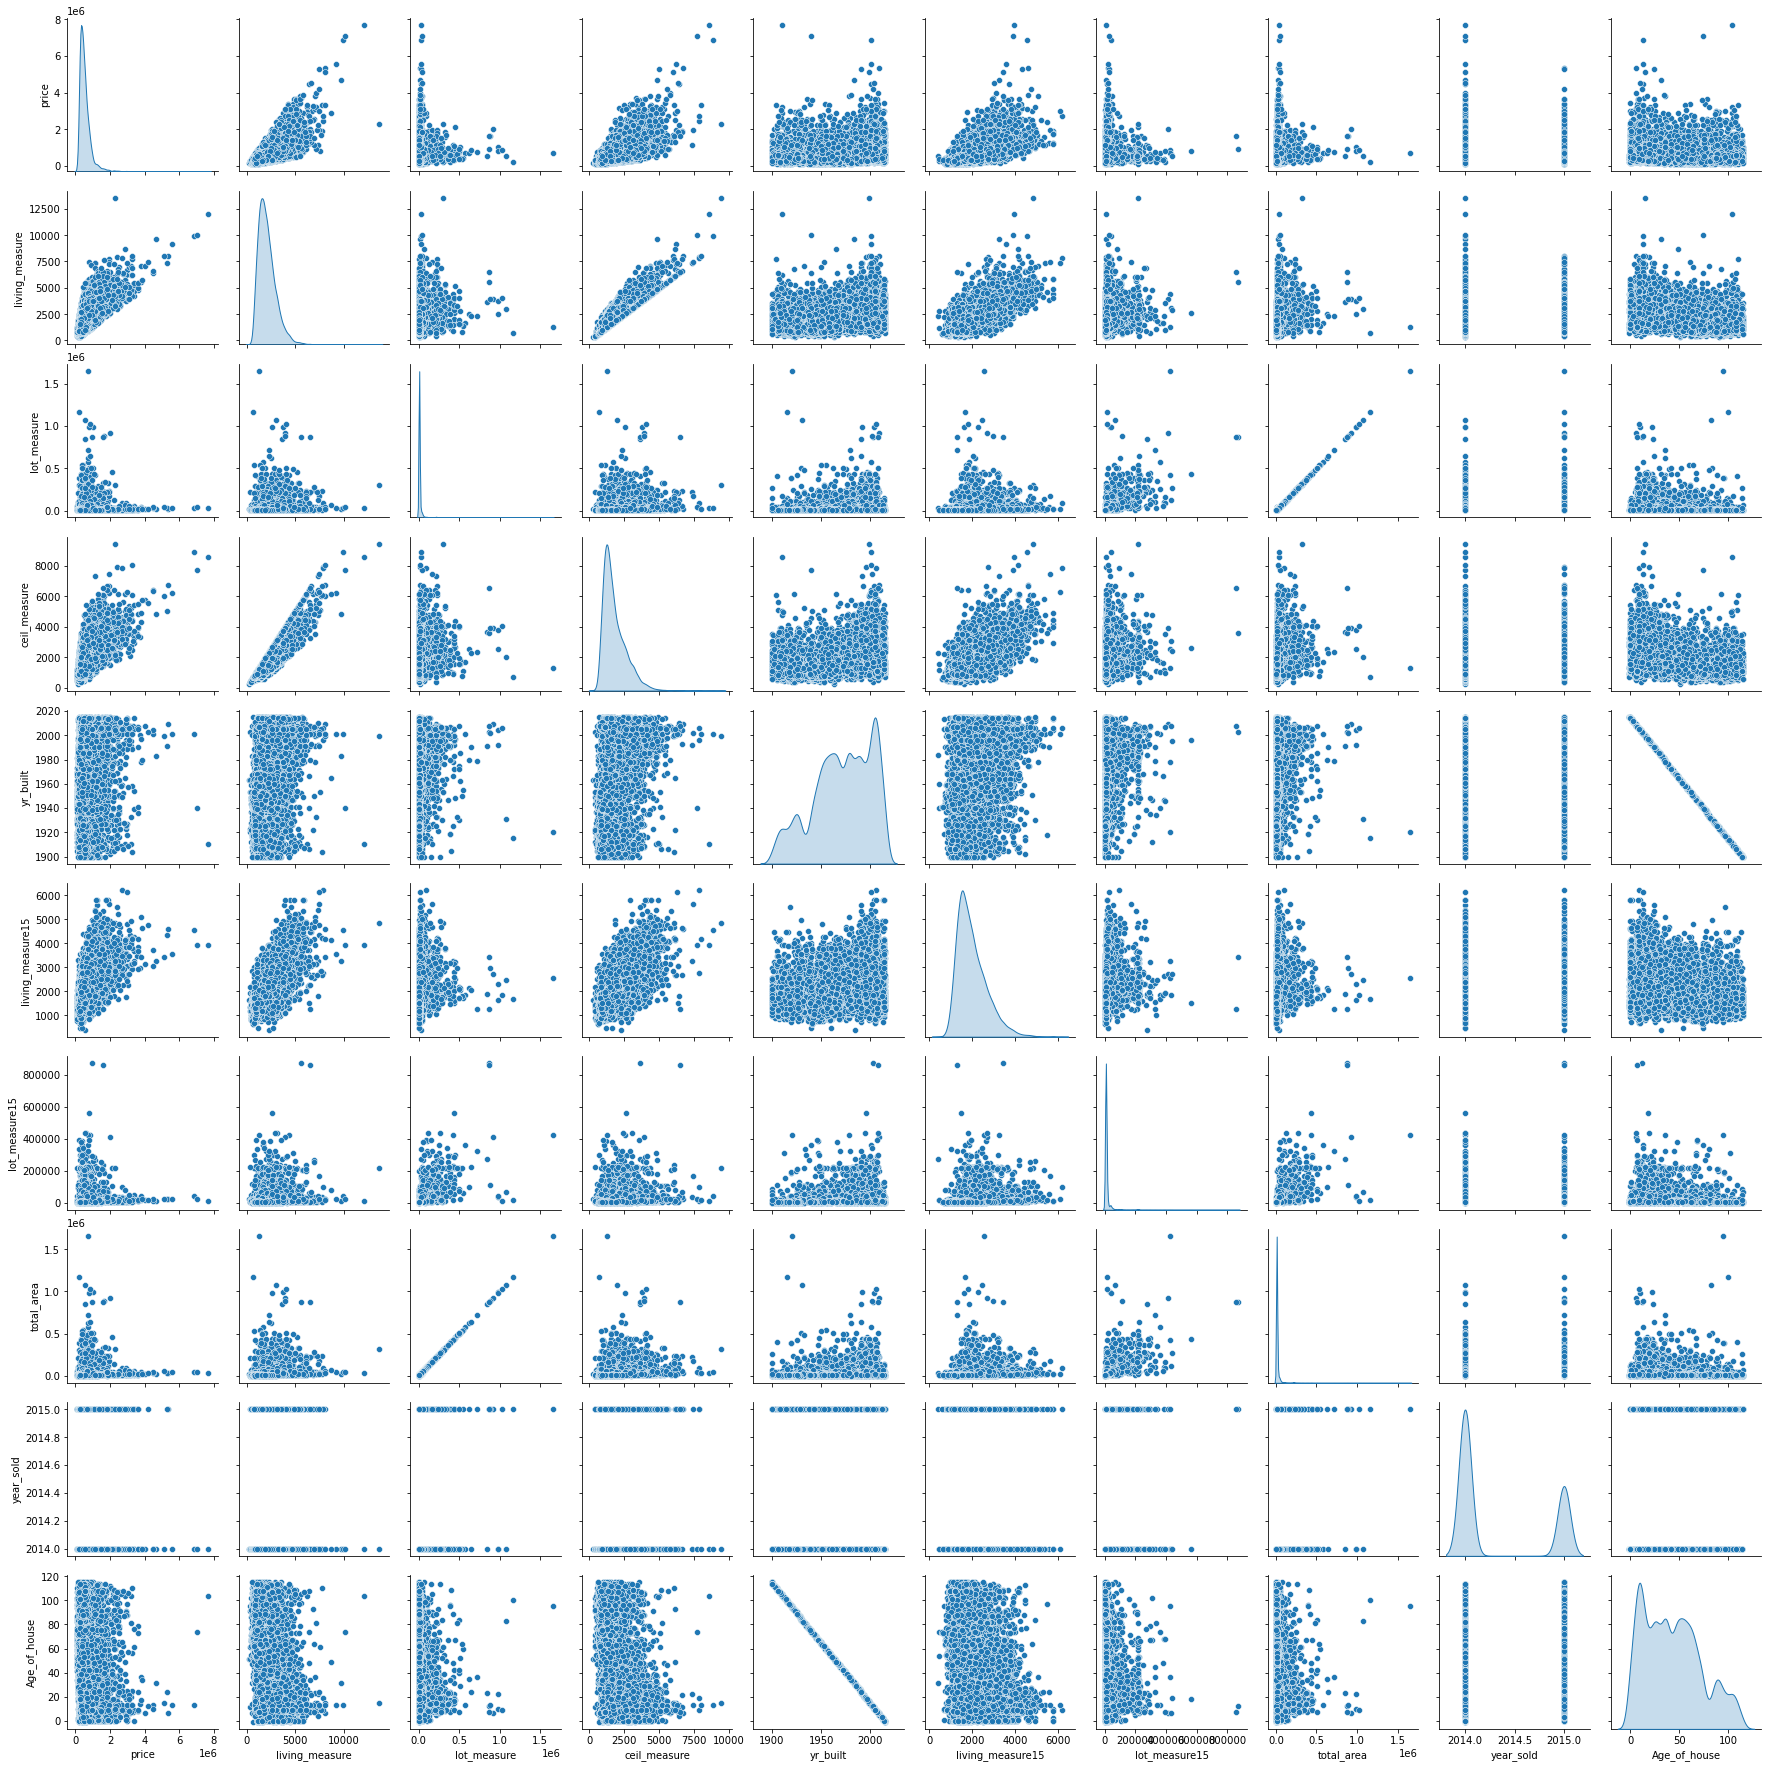

In [80]:
sns.pairplot(data=data, diag_kind='kde')

In [81]:
#correlation matrix
data.corr().T

price  living_measure  lot_measure  ceil_measure  \
price             1.000000        0.702233     0.090055      0.605793   
living_measure    0.702233        1.000000     0.172932      0.876676   
lot_measure       0.090055        0.172932     1.000000      0.183188   
ceil_measure      0.605793        0.876676     0.183188      1.000000   
yr_built          0.054619        0.317854     0.052741      0.423666   
living_measure15  0.585243        0.756034     0.145619      0.731377   
lot_measure15     0.082979        0.183691     0.715838      0.193746   
total_area        0.105152        0.194185     0.999710      0.201644   
year_sold         0.003195       -0.029080     0.004797     -0.023765   
Age_of_house     -0.054564       -0.318294    -0.052661     -0.424013   

                  yr_built  living_measure15  lot_measure15  total_area  \
price             0.054619          0.585243       0.082979    0.105152   
living_measure    0.317854          0.756034       0.183691    0.194185   
lot_measure       0.052741          0.145619       0.715838    0.999710   
ceil_measure      0.423666          0.731377       0.193746    0.201644   
yr_built          1.000000          0.325829       0.070396    0.059488   
living_measure15  0.325829          1.000000       0.184954    0.161560   
lot_measure15     0.070396          0.184954       1.000000    0.716892   
total_area        0.059488          0.161560       0.716892    1.000000   
year_sold         0.003376         -0.021515      -0.000907    0.004106   
Age_of_house     -0.999873         -0.326147      -0.070405   -0.059418   

                  year_sold  Age_of_house  
price              0.003195     -0.054564  
living_measure    -0.029080     -0.318294  
lot_measure        0.004797     -0.052661  
ceil_measure      -0.023765     -0.424013  
yr_built           0.003376     -0.999873  
living_measure15  -0.021515     -0.326147  
lot_measure15     -0.000907     -0.070405  
total_area         0.004106     -0.059418  
year_sold          1.000000      0.012542  
Age_of_house       0.012542      1.000000

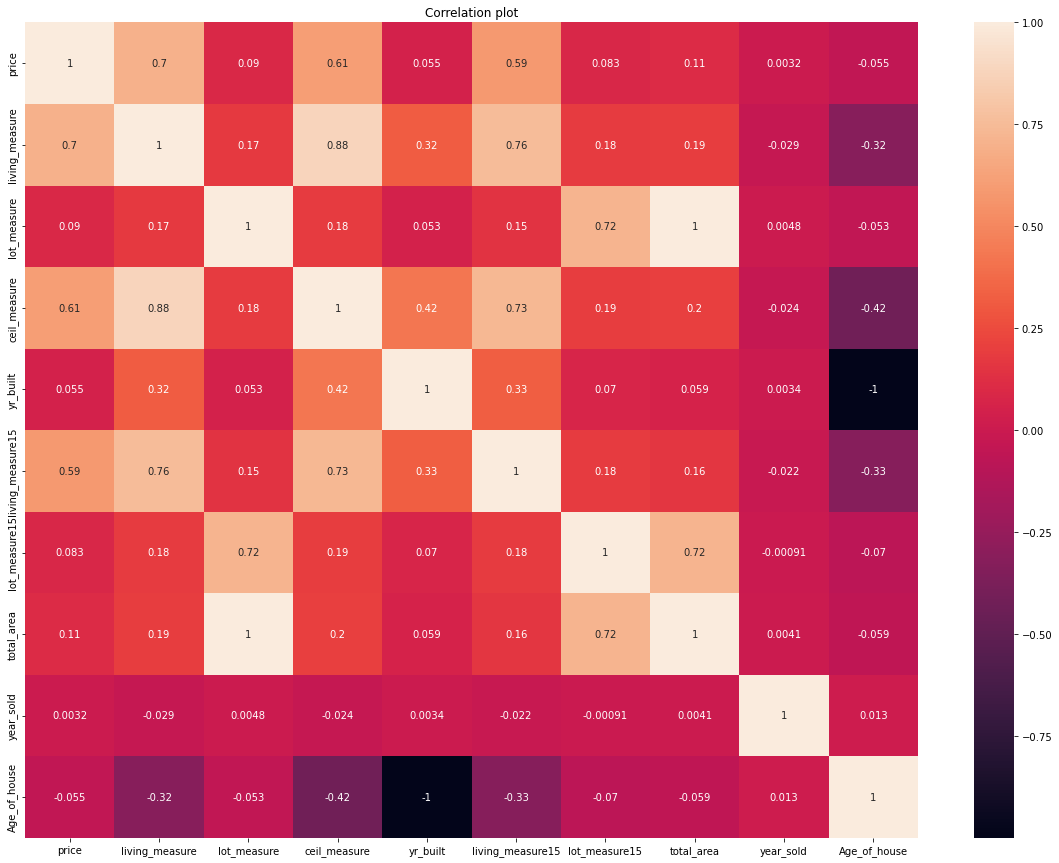

In [82]:
cor=data.corr()
plt.figure(figsize=(20,15))
plt.title('Correlation plot')
sns.heatmap(cor,annot = True)
plt.show()

In [83]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = data.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.5)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
yr_built         Age_of_house         0.999873
lot_measure      total_area           0.999710
living_measure   ceil_measure         0.876676
                 living_measure15     0.756034
living_measure15 ceil_measure         0.731377
total_area       lot_measure15        0.716892
lot_measure      lot_measure15        0.715838
price            living_measure       0.702233
ceil_measure     price                0.605793
price            living_measure15     0.585243

<AxesSubplot:>

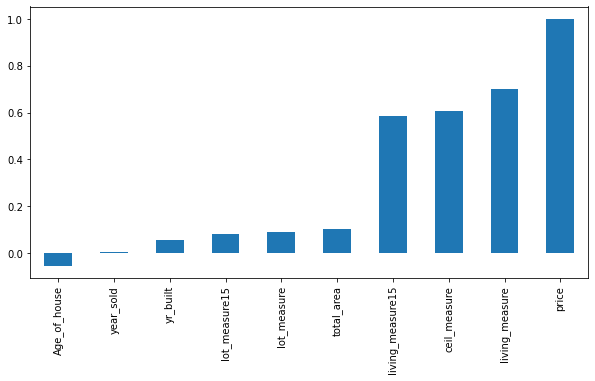

In [84]:
corr_mat = data.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = True).plot(kind = 'bar')


In [93]:
data=data.drop(columns='month_year')

In [94]:
data=data.drop(columns='yr_built')
# since yr_built and year_sold are related in age_of _house

In [95]:
data=data.drop(columns='year_sold')

In [96]:
data.head()

price room_bed room_bath  living_measure  lot_measure ceil coast sight  \
0  600000.0      4.0      1.75          3050.0       9440.0  1.0   0.0   0.0   
1  190000.0      2.0      1.00           670.0       3101.0  1.0   0.0   0.0   
2  735000.0      4.0      2.75          3040.0       2415.0  2.0   1.0   4.0   
3  257000.0      3.0      2.50          1740.0       3721.0  2.0   0.0   0.0   
4  450000.0      2.0      1.00          1120.0       4590.0  1.0   0.0   0.0   

  condition quality  ceil_measure  living_measure15  lot_measure15  \
0       3.0     8.0        1800.0            2020.0         8660.0   
1       4.0     6.0         670.0            1660.0         4100.0   
2       3.0     8.0        3040.0            2620.0         2433.0   
3       3.0     8.0        1740.0            2030.0         3794.0   
4       3.0     7.0        1120.0            1120.0         5100.0   

   total_area  Age_of_house have_basement Is_renovated has_furnished  
0       12490          49.0             1            0             0  
1        3771          67.0             0            0             0  
2        5455          48.0             0            0             0  
3        5461           5.0             0            0             0  
4        5710          91.0             0            0             0

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21386 entries, 0 to 21385
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             21386 non-null  float64 
 1   room_bed          21386 non-null  category
 2   room_bath         21386 non-null  category
 3   living_measure    21386 non-null  float64 
 4   lot_measure       21386 non-null  float64 
 5   ceil              21386 non-null  category
 6   coast             21386 non-null  category
 7   sight             21386 non-null  category
 8   condition         21386 non-null  category
 9   quality           21386 non-null  category
 10  ceil_measure      21386 non-null  float64 
 11  living_measure15  21386 non-null  float64 
 12  lot_measure15     21386 non-null  float64 
 13  total_area        21386 non-null  int32   
 14  Age_of_house      21386 non-null  float64 
 15  have_basement     21386 non-null  category
 16  Is_renovated      2138

In [98]:
hdf_with_outlier= data.copy()
# this contains outliers, so normal data

In [99]:
hdf=data.copy()
#we will treat the outliers here

In [100]:
hdf_log_trans=data.copy()
#for transfromation of the data

In [101]:
hdf_log_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21386 entries, 0 to 21385
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             21386 non-null  float64 
 1   room_bed          21386 non-null  category
 2   room_bath         21386 non-null  category
 3   living_measure    21386 non-null  float64 
 4   lot_measure       21386 non-null  float64 
 5   ceil              21386 non-null  category
 6   coast             21386 non-null  category
 7   sight             21386 non-null  category
 8   condition         21386 non-null  category
 9   quality           21386 non-null  category
 10  ceil_measure      21386 non-null  float64 
 11  living_measure15  21386 non-null  float64 
 12  lot_measure15     21386 non-null  float64 
 13  total_area        21386 non-null  int32   
 14  Age_of_house      21386 non-null  float64 
 15  have_basement     21386 non-null  category
 16  Is_renovated      2138

In [102]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [103]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [104]:
# Treating outliers for column - ceil_measure
lr,ur=remove_outlier(hdf.ceil_measure)
print(lr,ur)

-340.0 3740.0


In [105]:
#Dropping the outliers records from dataset
hdf.drop(hdf[(hdf.ceil_measure>ur) | (hdf.ceil_measure<lr)].index, inplace=True)

In [106]:
hdf.shape

(20779, 18)

In [107]:
21386-20779

607

In [108]:
#All the outliers values in both upper and lower limit have been removed
# lets us analyse by log transform
hdf_log_trans['ceil_measure_log']=np.log10(hdf_log_trans['ceil_measure'])

In [109]:
hdf_log_trans.drop(['ceil_measure'], axis=1, inplace=True)
hdf_log_trans.head()

price room_bed room_bath  living_measure  lot_measure ceil coast sight  \
0  600000.0      4.0      1.75          3050.0       9440.0  1.0   0.0   0.0   
1  190000.0      2.0      1.00           670.0       3101.0  1.0   0.0   0.0   
2  735000.0      4.0      2.75          3040.0       2415.0  2.0   1.0   4.0   
3  257000.0      3.0      2.50          1740.0       3721.0  2.0   0.0   0.0   
4  450000.0      2.0      1.00          1120.0       4590.0  1.0   0.0   0.0   

  condition quality  living_measure15  lot_measure15  total_area  \
0       3.0     8.0            2020.0         8660.0       12490   
1       4.0     6.0            1660.0         4100.0        3771   
2       3.0     8.0            2620.0         2433.0        5455   
3       3.0     8.0            2030.0         3794.0        5461   
4       3.0     7.0            1120.0         5100.0        5710   

   Age_of_house have_basement Is_renovated has_furnished  ceil_measure_log  
0          49.0             1            0             0          3.255273  
1          67.0             0            0             0          2.826075  
2          48.0             0            0             0          3.482874  
3           5.0             0            0             0          3.240549  
4          91.0             0            0             0          3.049218

skewness of ceil_measure is 0.819501917441141
kurtosis of ceil_measure is  -0.06890371534114159


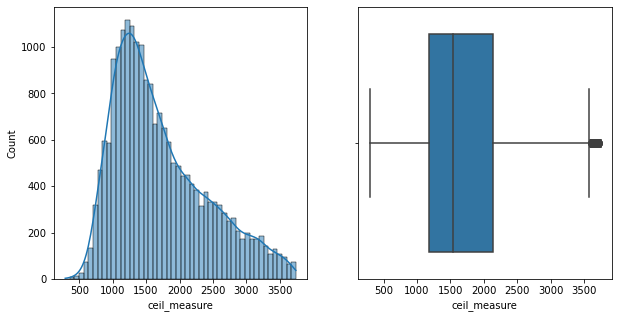

In [110]:
# ceil_measure
print("skewness of ceil_measure is",(hdf['ceil_measure']).skew())
print("kurtosis of ceil_measure is ",(hdf['ceil_measure']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot((hdf['ceil_measure']), kde=True, ax = axs[0])
sns.boxplot(x=hdf['ceil_measure'], ax = axs[1])
plt.show()

skewness of ceil_measure_log is 0.25247271051458364
kurtosis of ceil_measure_log is  -0.3175541093938836


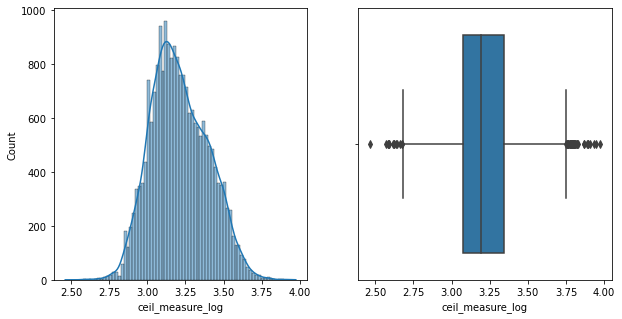

In [111]:
# Using log transformation
print("skewness of ceil_measure_log is",(hdf_log_trans['ceil_measure_log']).skew())
print("kurtosis of ceil_measure_log is ",(hdf_log_trans['ceil_measure_log']).kurtosis())

fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot((hdf_log_trans['ceil_measure_log']), kde=True, ax = axs[0])
sns.boxplot(x=(hdf_log_trans['ceil_measure_log']), ax = axs[1])
plt.show()

<AxesSubplot:xlabel='ceil_measure', ylabel='Count'>

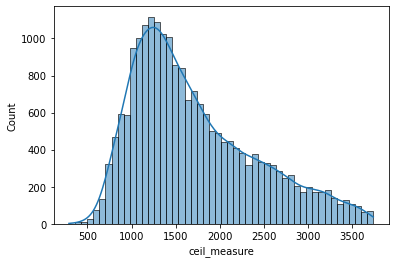

In [112]:
sns.histplot((hdf['ceil_measure']), kde=True)

<AxesSubplot:xlabel='ceil_measure_log', ylabel='Count'>

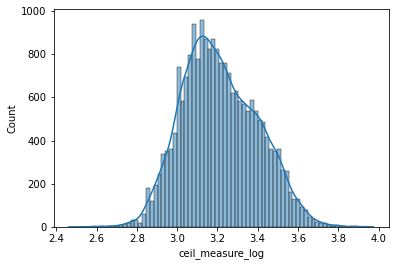

In [113]:
sns.histplot((hdf_log_trans['ceil_measure_log']), kde=True)

In [114]:
print("skewness of ceil_measure after dropping outlier is",(hdf['ceil_measure']).skew())
print("skewness of ceil_measure after log transformation is",(hdf_log_trans['ceil_measure_log']).skew())

skewness of ceil_measure after dropping outlier is 0.819501917441141
skewness of ceil_measure after log transformation is 0.25247271051458364


In [115]:
#Treating outliers for column - living_measure
lr_lim,ur_lim=remove_outlier(hdf.living_measure)
print(lr_lim,ur_lim)

-195.0 4085.0


In [116]:
hdf[(hdf.living_measure>ur_lim) | (hdf.living_measure<lr_lim)]

price room_bed room_bath  living_measure  lot_measure ceil coast  \
7      1160000.0      4.0      3.50          4680.0       9700.0  2.0   0.0   
171     975000.0      4.0      2.50          4270.0      43386.0  1.0   0.0   
435    1250000.0      4.0      4.25          4980.0      13000.0  2.0   0.0   
462    1150000.0      5.0      3.50          4350.0       6218.0  2.0   0.0   
482    1730000.0      5.0      3.50          5000.0      26540.0  2.0   0.0   
...          ...      ...       ...             ...          ...  ...   ...   
20927   850000.0      4.0      3.25          4350.0     112750.0  1.0   0.0   
21114   700000.0      4.0      3.50          4490.0       5099.0  2.0   0.0   
21126  1210000.0      4.0      3.50          4560.0      16643.0  1.0   0.0   
21270  1050000.0      6.0      4.00          5310.0      12741.0  2.0   0.0   
21278  1400000.0      4.0      3.25          4700.0       9160.0  1.0   0.0   

      sight condition quality  ceil_measure  living_measure15  lot_measure15  \
7       0.0       3.0    10.0        3360.0            2800.0        12343.0   
171     0.0       3.0    10.0        2680.0            3630.0        36180.0   
435     3.0       3.0     9.0        3080.0            2840.0        11308.0   
462     2.0       3.0    10.0        3520.0            3260.0         5989.0   
482     3.0       3.0    10.0        3410.0            3360.0        17398.0   
...     ...       ...     ...           ...               ...            ...   
20927   0.0       3.0     9.0        2200.0            2180.0       223027.0   
21114   0.0       3.0     9.0        3390.0            4290.0         5537.0   
21126   3.0       3.0    12.0        2230.0            4060.0        15177.0   
21270   2.0       3.0    10.0        3600.0            4190.0        12632.0   
21278   4.0       3.0    11.0        2520.0            2240.0         8700.0   

       total_area  Age_of_house have_basement Is_renovated has_furnished  
7           14380           9.0             1            0             1  
171         47656          23.0             1            0             1  
435         17980          32.0             1            0             1  
462         10568           7.0             1            0             1  
482         31540           6.0             1            0             1  
...           ...           ...           ...          ...           ...  
20927      117100           8.0             1            0             1  
21114        9589           8.0             1            0             1  
21126       21203          19.0             1            0             1  
21270       18051          48.0             1            0             1  
21278       13860           9.0             1            0             1  

[292 rows x 18 columns]

In [117]:
#Dropping the outliers records from dataset
hdf.drop(hdf[(hdf.living_measure>ur_lim) | (hdf.living_measure<lr_lim)].index, inplace=True)

In [118]:
hdf.shape

(20487, 18)

In [119]:
hdf.shape

(20487, 18)

In [120]:
20779-20487

292

In [121]:
#All the outliers values in both upper and lower limit have been removed
# lets us analyse by log transform
hdf_log_trans['living_measure_log']=np.log10(hdf_log_trans['living_measure'])

In [122]:
hdf_log_trans.drop(['living_measure'], axis=1, inplace=True)
hdf_log_trans.head()

price room_bed room_bath  lot_measure ceil coast sight condition  \
0  600000.0      4.0      1.75       9440.0  1.0   0.0   0.0       3.0   
1  190000.0      2.0      1.00       3101.0  1.0   0.0   0.0       4.0   
2  735000.0      4.0      2.75       2415.0  2.0   1.0   4.0       3.0   
3  257000.0      3.0      2.50       3721.0  2.0   0.0   0.0       3.0   
4  450000.0      2.0      1.00       4590.0  1.0   0.0   0.0       3.0   

  quality  living_measure15  lot_measure15  total_area  Age_of_house  \
0     8.0            2020.0         8660.0       12490          49.0   
1     6.0            1660.0         4100.0        3771          67.0   
2     8.0            2620.0         2433.0        5455          48.0   
3     8.0            2030.0         3794.0        5461           5.0   
4     7.0            1120.0         5100.0        5710          91.0   

  have_basement Is_renovated has_furnished  ceil_measure_log  \
0             1            0             0          3.255273   
1             0            0             0          2.826075   
2             0            0             0          3.482874   
3             0            0             0          3.240549   
4             0            0             0          3.049218   

   living_measure_log  
0            3.484300  
1            2.826075  
2            3.482874  
3            3.240549  
4            3.049218

<AxesSubplot:xlabel='living_measure', ylabel='Count'>

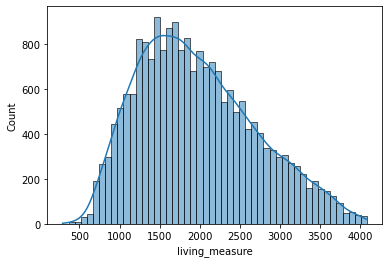

In [123]:
sns.histplot((hdf['living_measure']), kde=True)

<AxesSubplot:xlabel='living_measure_log', ylabel='Count'>

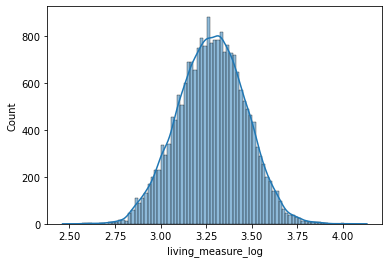

In [124]:
sns.histplot((hdf_log_trans['living_measure_log']), kde=True)

In [125]:
print("skewness of living_measure after dropping outlier is",(hdf['living_measure']).skew())
print("skewness of living_measure after log transformation is",(hdf_log_trans['living_measure_log']).skew())

skewness of living_measure after dropping outlier is 0.49098843929295133
skewness of living_measure after log transformation is -0.035604627059805834


In [126]:
#Treating outliers with column-lot_measure
# lr_lom and up_lom outlier treatment
lr_lom,ur_lom=remove_outlier(hdf.lot_measure)
print(lr_lom,ur_lom)

-2875.0 18125.0


In [127]:
hdf[(hdf.lot_measure>ur_lom) | (hdf.lot_measure<lr_lom)]

price room_bed room_bath  living_measure  lot_measure ceil coast  \
12     480000.0      3.0      2.50          2450.0      28185.0  2.0   0.0   
25     250000.0      1.0      1.00           720.0     123710.0  1.0   0.0   
28     635000.0      4.0      2.50          2470.0      77550.0  1.0   0.0   
37     740000.0      3.0      2.50          3000.0      25341.0  2.0   0.0   
87     505000.0      3.0      1.50          1830.0     217800.0  1.0   0.0   
...         ...      ...       ...             ...          ...  ...   ...   
21354  549950.0      3.0      1.75          2930.0     266587.0  2.0   0.0   
21355  255000.0      2.0      1.00          1610.0      19965.0  1.0   0.0   
21362  513000.0      3.0      2.50          2150.0     161607.0  2.0   0.0   
21381  685530.0      4.0      2.50          3130.0      60467.0  2.0   0.0   
21383  998000.0      3.0      3.75          3710.0      34412.0  2.0   0.0   

      sight condition quality  ceil_measure  living_measure15  lot_measure15  \
12      0.0       3.0     9.0        2450.0            2440.0        33541.0   
25      0.0       4.0     6.0         720.0            1860.0       297514.0   
28      0.0       4.0     7.0        2470.0            2490.0        40894.0   
37      0.0       3.0     9.0        3000.0            3000.0        32417.0   
87      0.0       3.0     7.0        1010.0            2450.0       165963.0   
...     ...       ...     ...           ...               ...            ...   
21354   0.0       3.0     8.0        2440.0            2700.0       438213.0   
21355   0.0       3.0     7.0        1610.0            2100.0        28400.0   
21362   0.0       3.0     7.0        1330.0            2400.0       207781.0   
21381   0.0       3.0     9.0        3130.0            2780.0        44224.0   
21383   0.0       3.0    10.0        2910.0            2390.0        34412.0   

       total_area  Age_of_house have_basement Is_renovated has_furnished  
12          30635          24.0             0            0             1  
25         124430          79.0             0            0             0  
28          80020          27.0             0            0             0  
37          28341          19.0             0            0             1  
87         219630          33.0             1            0             0  
...           ...           ...           ...          ...           ...  
21354      269517          19.0             1            0             0  
21355       21575          62.0             0            0             0  
21362      163757          20.0             1            0             0  
21381       63597          19.0             0            0             1  
21383       38122          36.0             1            0             1  

[2150 rows x 18 columns]

In [128]:
#Dropping the outliers records from dataset
hdf.drop(hdf[(hdf.lot_measure>ur_lom) | (hdf.lot_measure<lr_lom)].index, inplace=True)

In [129]:
hdf.shape

(18337, 18)

In [130]:
20487-18374

2113

In [131]:
#All the outliers values in both upper and lower limit have been removed
# lets us analyse by log transform
hdf_log_trans['lot_measure_log']=np.log10(hdf_log_trans['lot_measure'])

In [132]:
hdf_log_trans.drop(['lot_measure'], axis=1, inplace=True)
hdf_log_trans.head()

price room_bed room_bath ceil coast sight condition quality  \
0  600000.0      4.0      1.75  1.0   0.0   0.0       3.0     8.0   
1  190000.0      2.0      1.00  1.0   0.0   0.0       4.0     6.0   
2  735000.0      4.0      2.75  2.0   1.0   4.0       3.0     8.0   
3  257000.0      3.0      2.50  2.0   0.0   0.0       3.0     8.0   
4  450000.0      2.0      1.00  1.0   0.0   0.0       3.0     7.0   

   living_measure15  lot_measure15  total_area  Age_of_house have_basement  \
0            2020.0         8660.0       12490          49.0             1   
1            1660.0         4100.0        3771          67.0             0   
2            2620.0         2433.0        5455          48.0             0   
3            2030.0         3794.0        5461           5.0             0   
4            1120.0         5100.0        5710          91.0             0   

  Is_renovated has_furnished  ceil_measure_log  living_measure_log  \
0            0             0          3.255273            3.484300   
1            0             0          2.826075            2.826075   
2            0             0          3.482874            3.482874   
3            0             0          3.240549            3.240549   
4            0             0          3.049218            3.049218   

   lot_measure_log  
0         3.974972  
1         3.491502  
2         3.382917  
3         3.570660  
4         3.661813

<AxesSubplot:xlabel='lot_measure', ylabel='Count'>

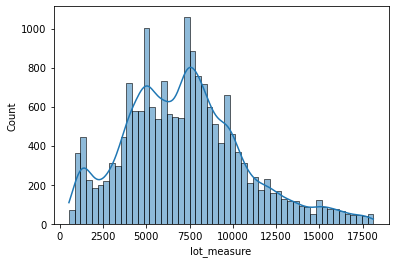

In [133]:
sns.histplot((hdf['lot_measure']), kde=True)

<AxesSubplot:xlabel='lot_measure_log', ylabel='Count'>

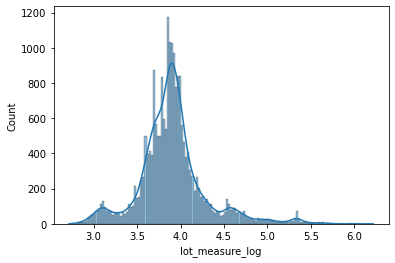

In [134]:
sns.histplot((hdf_log_trans['lot_measure_log']), kde=True)

In [135]:
print("skewness of lot_measure after dropping outlier is",(hdf['lot_measure']).skew())
print("skewness of lot_measure after log transformation is",(hdf_log_trans['lot_measure_log']).skew())

skewness of lot_measure after dropping outlier is 0.5329794773198375
skewness of lot_measure after log transformation is 0.959620886602672


In [136]:
hdf.head()

price room_bed room_bath  living_measure  lot_measure ceil coast sight  \
0  600000.0      4.0      1.75          3050.0       9440.0  1.0   0.0   0.0   
1  190000.0      2.0      1.00           670.0       3101.0  1.0   0.0   0.0   
2  735000.0      4.0      2.75          3040.0       2415.0  2.0   1.0   4.0   
3  257000.0      3.0      2.50          1740.0       3721.0  2.0   0.0   0.0   
4  450000.0      2.0      1.00          1120.0       4590.0  1.0   0.0   0.0   

  condition quality  ceil_measure  living_measure15  lot_measure15  \
0       3.0     8.0        1800.0            2020.0         8660.0   
1       4.0     6.0         670.0            1660.0         4100.0   
2       3.0     8.0        3040.0            2620.0         2433.0   
3       3.0     8.0        1740.0            2030.0         3794.0   
4       3.0     7.0        1120.0            1120.0         5100.0   

   total_area  Age_of_house have_basement Is_renovated has_furnished  
0       12490          49.0             1            0             0  
1        3771          67.0             0            0             0  
2        5455          48.0             0            0             0  
3        5461           5.0             0            0             0  
4        5710          91.0             0            0             0

In [137]:
hdf.shape

(18337, 18)

In [138]:
hdf_log_trans

price room_bed room_bath ceil coast sight condition quality  \
0       600000.0      4.0      1.75  1.0   0.0   0.0       3.0     8.0   
1       190000.0      2.0      1.00  1.0   0.0   0.0       4.0     6.0   
2       735000.0      4.0      2.75  2.0   1.0   4.0       3.0     8.0   
3       257000.0      3.0      2.50  2.0   0.0   0.0       3.0     8.0   
4       450000.0      2.0      1.00  1.0   0.0   0.0       3.0     7.0   
...          ...      ...       ...  ...   ...   ...       ...     ...   
21381   685530.0      4.0      2.50  2.0   0.0   0.0       3.0     9.0   
21382   535000.0      2.0      1.00  1.0   0.0   0.0       3.0     7.0   
21383   998000.0      3.0      3.75  2.0   0.0   0.0       3.0    10.0   
21384   262000.0      4.0      2.50  2.0   0.0   0.0       3.0     7.0   
21385  1150000.0      4.0      2.50  2.0   0.0   0.0       4.0     9.0   

       living_measure15  lot_measure15  total_area  Age_of_house  \
0                2020.0         8660.0       12490          49.0   
1                1660.0         4100.0        3771          67.0   
2                2620.0         2433.0        5455          48.0   
3                2030.0         3794.0        5461           5.0   
4                1120.0         5100.0        5710          91.0   
...                 ...            ...         ...           ...   
21381            2780.0        44224.0       63597          19.0   
21382            1530.0         4944.0        5871          75.0   
21383            2390.0        34412.0       38122          36.0   
21384            1160.0         7800.0        9360          18.0   
21385            1790.0         4875.0        6815          89.0   

      have_basement Is_renovated has_furnished  ceil_measure_log  \
0                 1            0             0          3.255273   
1                 0            0             0          2.826075   
2                 0            0             0          3.482874   
3                 0            0             0          3.240549   
4                 0            0             0          3.049218   
...             ...          ...           ...               ...   
21381             0            0             1          3.495544   
21382             1            0             0          2.963788   
21383             1            0             1          3.463893   
21384             0            0             0          3.193125   
21385             0            0             1          3.287802   

       living_measure_log  lot_measure_log  
0                3.484300         3.974972  
1                2.826075         3.491502  
2                3.482874         3.382917  
3                3.240549         3.570660  
4                3.049218         3.661813  
...                   ...              ...  
21381            3.495544         4.781518  
21382            3.012837         3.684935  
21383            3.569374         4.536710  
21384            3.193125         3.892095  
21385            3.287802         3.687975  

[21386 rows x 18 columns]

In [139]:
hdf_log_trans.shape

(21386, 18)

In [140]:
21386-18374

3012

In [141]:
3012/21386*100

14.083980173945571

For the convenience lets rename dataframes as
df0 ------> with outliers
df ------> without outliers (Outliers have been dropped)
df1-------> Log transformed (Some of the features only)


In [142]:
df0=hdf_with_outlier.copy()
# this contains outliers, so normal data

In [143]:
df=hdf.copy()
#df ------> without outliers (Outliers have been dropped)


In [144]:
df1=hdf_log_trans.copy()
#for transfromation of the data

In [145]:
df0.shape

(21386, 18)

In [146]:
df.shape

(18337, 18)

In [147]:
df1.shape


(21386, 18)

In [148]:
#One hot encoding:
df_dummy=df.copy()

In [149]:
df_dummy_data = pd.get_dummies(df_dummy)

In [150]:
df_dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18337 entries, 0 to 21385
Data columns (total 87 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             18337 non-null  float64
 1   living_measure    18337 non-null  float64
 2   lot_measure       18337 non-null  float64
 3   ceil_measure      18337 non-null  float64
 4   living_measure15  18337 non-null  float64
 5   lot_measure15     18337 non-null  float64
 6   total_area        18337 non-null  int32  
 7   Age_of_house      18337 non-null  float64
 8   room_bed_0.0      18337 non-null  uint8  
 9   room_bed_1.0      18337 non-null  uint8  
 10  room_bed_2.0      18337 non-null  uint8  
 11  room_bed_3.0      18337 non-null  uint8  
 12  room_bed_4.0      18337 non-null  uint8  
 13  room_bed_5.0      18337 non-null  uint8  
 14  room_bed_6.0      18337 non-null  uint8  
 15  room_bed_7.0      18337 non-null  uint8  
 16  room_bed_8.0      18337 non-null  uint8 

In [151]:
df_dummy_data.drop(columns='room_bed_33.0',inplace =True)

In [152]:
df_dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18337 entries, 0 to 21385
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             18337 non-null  float64
 1   living_measure    18337 non-null  float64
 2   lot_measure       18337 non-null  float64
 3   ceil_measure      18337 non-null  float64
 4   living_measure15  18337 non-null  float64
 5   lot_measure15     18337 non-null  float64
 6   total_area        18337 non-null  int32  
 7   Age_of_house      18337 non-null  float64
 8   room_bed_0.0      18337 non-null  uint8  
 9   room_bed_1.0      18337 non-null  uint8  
 10  room_bed_2.0      18337 non-null  uint8  
 11  room_bed_3.0      18337 non-null  uint8  
 12  room_bed_4.0      18337 non-null  uint8  
 13  room_bed_5.0      18337 non-null  uint8  
 14  room_bed_6.0      18337 non-null  uint8  
 15  room_bed_7.0      18337 non-null  uint8  
 16  room_bed_8.0      18337 non-null  uint8 

In [153]:
df_dummy_data.shape

(18337, 86)

In [154]:
df_dummy_data.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure',
       'living_measure15', 'lot_measure15', 'total_area', 'Age_of_house',
       'room_bed_0.0', 'room_bed_1.0', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0', 'room_bed_7.0',
       'room_bed_8.0', 'room_bed_9.0', 'room_bed_10.0', 'room_bed_11.0',
       'room_bath_0.0', 'room_bath_0.5', 'room_bath_0.75', 'room_bath_1.0',
       'room_bath_1.25', 'room_bath_1.5', 'room_bath_1.75', 'room_bath_2.0',
       'room_bath_2.25', 'room_bath_2.5', 'room_bath_2.75', 'room_bath_3.0',
       'room_bath_3.25', 'room_bath_3.5', 'room_bath_3.75', 'room_bath_4.0',
       'room_bath_4.25', 'room_bath_4.5', 'room_bath_4.75', 'room_bath_5.0',
       'room_bath_5.25', 'room_bath_5.5', 'room_bath_5.75', 'room_bath_6.0',
       'room_bath_6.25', 'room_bath_6.5', 'room_bath_6.75', 'room_bath_7.5',
       'room_bath_7.75', 'room_bath_8.0', 'ceil_1.0', 'ceil_1.5', 'ceil_2.0',
       'ceil_2.5', 'ceil_3.0',

In [156]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import zscore

Four different dataframes has been made for modelling.
1. Original dataframe with outliers
2. Dataframe without outliers
3. Dataframe with log transformed columns
4. Scaled dataframe

In [157]:
 ResultsDF = pd. DataFrame()

In [158]:
print(ResultsDF)

Empty DataFrame
Columns: []
Index: []


In [159]:
#function to calculate model performance
def model_performance(model,method,data_type, X_train, X_test, y_train, y_test):
    """Input: takes machine learning model, method used, training and test data set as input
       *model: Machine learning used
       *method: method used
       * data_type: Type of data used
       *X_tain, X_test: training and testing independent features
       * y_train, y_test: training and testing target variable
       output: prints out model performance and adds difference performance"""
   
    global ResultsDF
    model.fit(X_train, y_train)
    
    print('Method: ', str(method))
    print('--'*10)
    print("Accuracy score of train data: ", model.score(X_train, y_train))
    print("Accuracy score of test data: ", model.score(X_test, y_test))
    print()
    y_pred= model.predict(X_test)
    
    model_r2_score ="%.3f" %float(r2_score(y_test, y_pred))
    model_mse = "%.3f" %float(mean_squared_error(y_test, y_pred))
    model_mae = round(mean_absolute_error(y_test, y_pred),3)
    
    TempResultsDF= pd.DataFrame({'Method':[str(method)], 'Data type':[str(data_type)], 'r2_score':model_r2_score,'Mean_squared_error':model_mse, 'Mean_absolute_error':model_mae})
    
    ResultsDF =pd.concat([ResultsDF, TempResultsDF], ignore_index=True)
    return ResultsDF

In [263]:
ResultsDF= pd.DataFrame({'Method':[str(method)], 'Data type':[str(data_type)], 'r2_score':model_r2_score,'Mean_squared_error':model_mse, 'Mean_absolute_error':model_mae})
    

NameError: name 'method' is not defined

In [160]:
df0.shape

(21386, 18)

In [161]:
df0_dummy=df0.copy()

In [162]:
df0_dummy = pd.get_dummies(df0_dummy)

In [163]:
df0_dummy.drop(columns='room_bed_33.0',inplace =True)

In [164]:
df0_dummy.shape

(21386, 86)

In [165]:
df0_dummy.head()

price  living_measure  lot_measure  ceil_measure  living_measure15  \
0  600000.0          3050.0       9440.0        1800.0            2020.0   
1  190000.0           670.0       3101.0         670.0            1660.0   
2  735000.0          3040.0       2415.0        3040.0            2620.0   
3  257000.0          1740.0       3721.0        1740.0            2030.0   
4  450000.0          1120.0       4590.0        1120.0            1120.0   

   lot_measure15  total_area  Age_of_house  room_bed_0.0  room_bed_1.0  \
0         8660.0       12490          49.0             0             0   
1         4100.0        3771          67.0             0             0   
2         2433.0        5455          48.0             0             0   
3         3794.0        5461           5.0             0             0   
4         5100.0        5710          91.0             0             0   

   room_bed_2.0  room_bed_3.0  room_bed_4.0  room_bed_5.0  room_bed_6.0  \
0             0             0             1             0             0   
1             1             0             0             0             0   
2             0             0             1             0             0   
3             0             1             0             0             0   
4             1             0             0             0             0   

   room_bed_7.0  room_bed_8.0  room_bed_9.0  room_bed_10.0  room_bed_11.0  \
0             0             0             0              0              0   
1             0             0             0              0              0   
2             0             0             0              0              0   
3             0             0             0              0              0   
4             0             0             0              0              0   

   room_bath_0.0  room_bath_0.5  room_bath_0.75  room_bath_1.0  \
0              0              0               0              0   
1              0              0               0              1   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              1   

   room_bath_1.25  room_bath_1.5  room_bath_1.75  room_bath_2.0  \
0               0              0               1              0   
1               0              0               0              0   
2               0              0               0              0   
3               0              0               0              0   
4               0              0               0              0   

   room_bath_2.25  room_bath_2.5  room_bath_2.75  room_bath_3.0  \
0               0              0               0              0   
1               0              0               0              0   
2               0              0               1              0   
3               0              1               0              0   
4               0              0               0              0   

   room_bath_3.25  room_bath_3.5  room_bath_3.75  room_bath_4.0  \
0               0              0               0              0   
1               0              0               0              0   
2               0              0               0              0   
3               0              0               0              0   
4               0              0               0              0   

   room_bath_4.25  room_bath_4.5  room_bath_4.75  room_bath_5.0  \
0               0              0               0              0   
1               0              0               0              0   
2               0              0               0              0   
3               0              0               0              0   
4               0              0               0              0   

   room_bath_5.25  room_bath_5.5  room_bath_5.75  room_bath_6.0  \
0               0              0               0              0   
1               0              0               

In [166]:
df0_dummy.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure',
       'living_measure15', 'lot_measure15', 'total_area', 'Age_of_house',
       'room_bed_0.0', 'room_bed_1.0', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0', 'room_bed_7.0',
       'room_bed_8.0', 'room_bed_9.0', 'room_bed_10.0', 'room_bed_11.0',
       'room_bath_0.0', 'room_bath_0.5', 'room_bath_0.75', 'room_bath_1.0',
       'room_bath_1.25', 'room_bath_1.5', 'room_bath_1.75', 'room_bath_2.0',
       'room_bath_2.25', 'room_bath_2.5', 'room_bath_2.75', 'room_bath_3.0',
       'room_bath_3.25', 'room_bath_3.5', 'room_bath_3.75', 'room_bath_4.0',
       'room_bath_4.25', 'room_bath_4.5', 'room_bath_4.75', 'room_bath_5.0',
       'room_bath_5.25', 'room_bath_5.5', 'room_bath_5.75', 'room_bath_6.0',
       'room_bath_6.25', 'room_bath_6.5', 'room_bath_6.75', 'room_bath_7.5',
       'room_bath_7.75', 'room_bath_8.0', 'ceil_1.0', 'ceil_1.5', 'ceil_2.0',
       'ceil_2.5', 'ceil_3.0',

In [167]:
df1.shape

(21386, 18)

In [168]:
df1_dummy=df1.copy()

In [169]:
df1_dummy = pd.get_dummies(df1_dummy)

In [170]:
df1_dummy.drop(columns='room_bed_33.0',inplace =True)

In [171]:
df1_dummy.shape


(21386, 86)

In [172]:
df0_dummy.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure',
       'living_measure15', 'lot_measure15', 'total_area', 'Age_of_house',
       'room_bed_0.0', 'room_bed_1.0', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0', 'room_bed_7.0',
       'room_bed_8.0', 'room_bed_9.0', 'room_bed_10.0', 'room_bed_11.0',
       'room_bath_0.0', 'room_bath_0.5', 'room_bath_0.75', 'room_bath_1.0',
       'room_bath_1.25', 'room_bath_1.5', 'room_bath_1.75', 'room_bath_2.0',
       'room_bath_2.25', 'room_bath_2.5', 'room_bath_2.75', 'room_bath_3.0',
       'room_bath_3.25', 'room_bath_3.5', 'room_bath_3.75', 'room_bath_4.0',
       'room_bath_4.25', 'room_bath_4.5', 'room_bath_4.75', 'room_bath_5.0',
       'room_bath_5.25', 'room_bath_5.5', 'room_bath_5.75', 'room_bath_6.0',
       'room_bath_6.25', 'room_bath_6.5', 'room_bath_6.75', 'room_bath_7.5',
       'room_bath_7.75', 'room_bath_8.0', 'ceil_1.0', 'ceil_1.5', 'ceil_2.0',
       'ceil_2.5', 'ceil_3.0',

In [173]:
X0 = df0_dummy.drop(columns='price')
y0 = df0_dummy.price

In [174]:
X_train0,X_test0,y_train0,y_test0 = train_test_split(X0,y0,test_size = 0.3,random_state = 100) 

In [175]:
print("Shape of X_train0: {}",X_train0.shape)
print("Shape of X_test0: {}",X_test0.shape)
print("Shape of y_train0: {}",y_train0.shape)
print("Shape of y_test0: {}",y_test0.shape)

Shape of X_train0: {} (14970, 85)
Shape of X_test0: {} (6416, 85)
Shape of y_train0: {} (14970,)
Shape of y_test0: {} (6416,)


In [176]:
X = df_dummy_data.drop(columns='price')
y = df_dummy_data.price

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100) 

In [178]:
print("Shape of X_train: {}",X_train.shape)
print("Shape of X_test: {}",X_test.shape)
print("Shape of y_train: {}",y_train.shape)
print("Shape of y_test: {}",y_test.shape)

Shape of X_train: {} (12835, 85)
Shape of X_test: {} (5502, 85)
Shape of y_train: {} (12835,)
Shape of y_test: {} (5502,)


In [179]:
X1 = df1_dummy.drop(columns='price')
y1 = df1_dummy.price

In [180]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3,random_state = 100) 

In [181]:
print("Shape of X_train1: {}",X_train1.shape)
print("Shape of X_test1: {}",X_test1.shape)
print("Shape of y_train1: {}",y_train1.shape)
print("Shape of y_test1: {}",y_test1.shape)

Shape of X_train1: {} (14970, 85)
Shape of X_test1: {} (6416, 85)
Shape of y_train1: {} (14970,)
Shape of y_test1: {} (6416,)


In [182]:
#linear regression with outliers
lr_model= LinearRegression(n_jobs=1)
model_performance(lr_model, 'Linear Regression', 'With outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Linear Regression
--------------------
Accuracy score of train data:  0.6963219692306332
Accuracy score of test data:  0.6890032106628108



Method      Data type r2_score Mean_squared_error  \
0  Linear Regression  With outliers    0.689    41274295457.343   

   Mean_absolute_error  
0           133680.606

In [183]:
#linear regression without outliers

model_performance(lr_model, 'Linear Regression', 'Without outliers', X_train, X_test, y_train, y_test)

Method:  Linear Regression
--------------------
Accuracy score of train data:  0.6337635917056778
Accuracy score of test data:  0.6222338035415539



Method         Data type r2_score Mean_squared_error  \
0  Linear Regression     With outliers    0.689    41274295457.343   
1  Linear Regression  Without outliers    0.622    26168992379.763   

   Mean_absolute_error  
0           133680.606  
1           113992.453

In [184]:
#linear regression for data with log transformation

model_performance(lr_model, 'Linear Regression', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Linear Regression
--------------------
Accuracy score of train data:  0.6930358281905996
Accuracy score of test data:  0.6852690865635946



Method                Data type r2_score Mean_squared_error  \
0  Linear Regression            With outliers    0.689    41274295457.343   
1  Linear Regression         Without outliers    0.622    26168992379.763   
2  Linear Regression  With log transformation    0.685    41769874018.375   

   Mean_absolute_error  
0           133680.606  
1           113992.453  
2           132962.448

In [185]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X0_train_scaled = ss.fit_transform(X_train0)
X0_test_scaled = ss.transform(X_test0)


In [186]:
#model for data with scaling:
model_performance(lr_model, 'Linear Regression', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  Linear Regression
--------------------
Accuracy score of train data:  0.696321921044256
Accuracy score of test data:  -9.497856600048187e+18



Method                Data type                  r2_score  \
0  Linear Regression            With outliers                     0.689   
1  Linear Regression         Without outliers                     0.622   
2  Linear Regression  With log transformation                     0.685   
3  Linear Regression                   Scaled  -9497856600048187392.000   

                    Mean_squared_error  Mean_absolute_error  
0                      41274295457.343         1.336806e+05  
1                      26168992379.763         1.139925e+05  
2                      41769874018.375         1.329624e+05  
3  1260518928048580256747264933888.000         1.966949e+13

In [187]:
#KNN Regressor data with outliers
knn_model_final = KNeighborsRegressor(metric='manhattan', n_neighbors=15, weights='distance')
model_performance(knn_model_final, 'KNN Regressor', 'with outliers', X_train0, X_test0, y_train0, y_test0)

Method:  KNN Regressor
--------------------
Accuracy score of train data:  0.9999038246456791
Accuracy score of test data:  0.5207788306463754



Method                Data type                  r2_score  \
0  Linear Regression            With outliers                     0.689   
1  Linear Regression         Without outliers                     0.622   
2  Linear Regression  With log transformation                     0.685   
3  Linear Regression                   Scaled  -9497856600048187392.000   
4      KNN Regressor            with outliers                     0.521   

                    Mean_squared_error  Mean_absolute_error  
0                      41274295457.343         1.336806e+05  
1                      26168992379.763         1.139925e+05  
2                      41769874018.375         1.329624e+05  
3  1260518928048580256747264933888.000         1.966949e+13  
4                      63600386921.903         1.514864e+05

In [188]:
#kNN without outliers
model_performance(knn_model_final, 'KNN Regressor', 'without outliers', X_train, X_test, y_train, y_test)

Method:  KNN Regressor
--------------------
Accuracy score of train data:  0.999851744323192
Accuracy score of test data:  0.47462538333022997



Method                Data type                  r2_score  \
0  Linear Regression            With outliers                     0.689   
1  Linear Regression         Without outliers                     0.622   
2  Linear Regression  With log transformation                     0.685   
3  Linear Regression                   Scaled  -9497856600048187392.000   
4      KNN Regressor            with outliers                     0.521   
5      KNN Regressor         without outliers                     0.475   

                    Mean_squared_error  Mean_absolute_error  
0                      41274295457.343         1.336806e+05  
1                      26168992379.763         1.139925e+05  
2                      41769874018.375         1.329624e+05  
3  1260518928048580256747264933888.000         1.966949e+13  
4                      63600386921.903         1.514864e+05  
5                      36394268383.577         1.317671e+05

In [189]:
# KNN for data with log transformation

model_performance(knn_model_final, 'KNN Regressor', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  KNN Regressor
--------------------
Accuracy score of train data:  0.9999038246456791
Accuracy score of test data:  0.3681279803051787



Method                Data type                  r2_score  \
0  Linear Regression            With outliers                     0.689   
1  Linear Regression         Without outliers                     0.622   
2  Linear Regression  With log transformation                     0.685   
3  Linear Regression                   Scaled  -9497856600048187392.000   
4      KNN Regressor            with outliers                     0.521   
5      KNN Regressor         without outliers                     0.475   
6      KNN Regressor  With log transformation                     0.368   

                    Mean_squared_error  Mean_absolute_error  
0                      41274295457.343         1.336806e+05  
1                      26168992379.763         1.139925e+05  
2                      41769874018.375         1.329624e+05  
3  1260518928048580256747264933888.000         1.966949e+13  
4                      63600386921.903         1.514864e+05  
5                      36394268383.577         1.317671e+05  
6                      83859619540.430         1.730901e+05

In [190]:
#KNN model for data with scaling:
model_performance(knn_model_final, 'KNN Regressor', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  KNN Regressor
--------------------
Accuracy score of train data:  0.9999038246456791
Accuracy score of test data:  0.6413661625447705



Method                Data type                  r2_score  \
0  Linear Regression            With outliers                     0.689   
1  Linear Regression         Without outliers                     0.622   
2  Linear Regression  With log transformation                     0.685   
3  Linear Regression                   Scaled  -9497856600048187392.000   
4      KNN Regressor            with outliers                     0.521   
5      KNN Regressor         without outliers                     0.475   
6      KNN Regressor  With log transformation                     0.368   
7      KNN Regressor                   Scaled                     0.641   

                    Mean_squared_error  Mean_absolute_error  
0                      41274295457.343         1.336806e+05  
1                      26168992379.763         1.139925e+05  
2                      41769874018.375         1.329624e+05  
3  1260518928048580256747264933888.000         1.966949e+13  
4                      63600386921.903         1.514864e+05  
5                      36394268383.577         1.317671e+05  
6                      83859619540.430         1.730901e+05  
7                      47596500914.609         1.306030e+05

In [191]:
#SVR data with outliers
svr_model_final = SVR(C=10, gamma=0.001)
model_performance(svr_model_final, 'SVR', 'with outliers', X_train0, X_test0, y_train0, y_test0)

Method:  SVR
--------------------
Accuracy score of train data:  -0.06035349610869911
Accuracy score of test data:  -0.05986137862137997



Method                Data type                  r2_score  \
0  Linear Regression            With outliers                     0.689   
1  Linear Regression         Without outliers                     0.622   
2  Linear Regression  With log transformation                     0.685   
3  Linear Regression                   Scaled  -9497856600048187392.000   
4      KNN Regressor            with outliers                     0.521   
5      KNN Regressor         without outliers                     0.475   
6      KNN Regressor  With log transformation                     0.368   
7      KNN Regressor                   Scaled                     0.641   
8                SVR            with outliers                    -0.060   

                    Mean_squared_error  Mean_absolute_error  
0                      41274295457.343         1.336806e+05  
1                      26168992379.763         1.139925e+05  
2                      41769874018.375         1.329624e+05  
3  1260518928048580256747264933888.000         1.966949e+13  
4                      63600386921.903         1.514864e+05  
5                      36394268383.577         1.317671e+05  
6                      83859619540.430         1.730901e+05  
7                      47596500914.609         1.306030e+05  
8                     140660718003.800         2.221589e+05

In [192]:
#SVR without outliers
model_performance(svr_model_final, 'SVR', 'without outliers', X_train, X_test, y_train, y_test)

Method:  SVR
--------------------
Accuracy score of train data:  -0.053232592220606056
Accuracy score of test data:  -0.04437222478304714



Method                Data type                  r2_score  \
0  Linear Regression            With outliers                     0.689   
1  Linear Regression         Without outliers                     0.622   
2  Linear Regression  With log transformation                     0.685   
3  Linear Regression                   Scaled  -9497856600048187392.000   
4      KNN Regressor            with outliers                     0.521   
5      KNN Regressor         without outliers                     0.475   
6      KNN Regressor  With log transformation                     0.368   
7      KNN Regressor                   Scaled                     0.641   
8                SVR            with outliers                    -0.060   
9                SVR         without outliers                    -0.044   

                    Mean_squared_error  Mean_absolute_error  
0                      41274295457.343         1.336806e+05  
1                      26168992379.763         1.139925e+05  
2                      41769874018.375         1.329624e+05  
3  1260518928048580256747264933888.000         1.966949e+13  
4                      63600386921.903         1.514864e+05  
5                      36394268383.577         1.317671e+05  
6                      83859619540.430         1.730901e+05  
7                      47596500914.609         1.306030e+05  
8                     140660718003.800         2.221589e+05  
9                      72346782343.691         1.842521e+05

In [193]:
# SVR for data with log transformation

model_performance(svr_model_final, 'SVR', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  SVR
--------------------
Accuracy score of train data:  -0.06035321887566791
Accuracy score of test data:  -0.059861015583829946



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05

In [194]:
#SVR model for data with scaling:
model_performance(svr_model_final, 'SVR', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  SVR
--------------------
Accuracy score of train data:  -0.05567115347621088
Accuracy score of test data:  -0.055010070172409



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05

Decision Tree

In [195]:
#DTR data with outliers
dtr_model_final = DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=6, min_samples_leaf=3)
model_performance(dtr_model_final, 'Decision tree', 'with outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Decision tree
--------------------
Accuracy score of train data:  0.5692433735163487
Accuracy score of test data:  0.5083215401704035



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05

In [196]:
#DTR without outliers
model_performance(dtr_model_final, 'Decision tree', 'without outliers', X_train, X_test, y_train, y_test)

Method:  Decision tree
--------------------
Accuracy score of train data:  0.4485335792627103
Accuracy score of test data:  0.39651916554959465



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05

In [197]:
# DTR for data with log transformation

model_performance(dtr_model_final, 'Decision tree', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Decision tree
--------------------
Accuracy score of train data:  0.5547784833561206
Accuracy score of test data:  0.490109842252323



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05

In [198]:
#DTR model for data with scaling:
model_performance(dtr_model_final, 'Decision tree', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  Decision tree
--------------------
Accuracy score of train data:  0.5479902299004512
Accuracy score of test data:  0.4801536797371806



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05

Random Forest

In [199]:
#Random forest data with outliers
rfr_model_final = RandomForestRegressor(n_estimators=100, criterion='mse',max_depth=7, max_features=6, min_samples_leaf=3)
model_performance(rfr_model_final, 'Random forest', 'with outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Random forest
--------------------
Accuracy score of train data:  0.669683452847464
Accuracy score of test data:  0.6441235369775784



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05

In [200]:
#Random forest without outliers
model_performance(rfr_model_final, 'Random forest', 'without outliers', X_train, X_test, y_train, y_test)

Method:  Random forest
--------------------
Accuracy score of train data:  0.5914559513195914
Accuracy score of test data:  0.5544864283545892



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05

In [201]:
# Random forest for data with log transformation

model_performance(rfr_model_final, 'Random forest', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Random forest
--------------------
Accuracy score of train data:  0.670309730228343
Accuracy score of test data:  0.6447669949680332



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05

In [202]:
#Random forest model for data with scaling:
model_performance(rfr_model_final, 'Random forest', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  Random forest
--------------------
Accuracy score of train data:  0.6689596780569222
Accuracy score of test data:  0.644671366689685



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05

 Gradient boosting

In [203]:
 
#Gradient boosting data with outliers
gbr_model_final = GradientBoostingRegressor(n_estimators=200, learning_rate= 0.1)
model_performance(gbr_model_final, 'Gradient boosting', 'with outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Gradient boosting
--------------------
Accuracy score of train data:  0.8204821618281508
Accuracy score of test data:  0.7554218172066347



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05

In [204]:
#Gradient boosting without outliers
model_performance(gbr_model_final, 'Gradient boosting', 'without outliers', X_train, X_test, y_train, y_test)

Method:  Gradient boosting
--------------------
Accuracy score of train data:  0.740620118116913
Accuracy score of test data:  0.6783707864291304



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05

In [205]:
# Gradient boosting for data with log transformation

model_performance(gbr_model_final, 'Gradient boosting', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Gradient boosting
--------------------
Accuracy score of train data:  0.8204821618281508
Accuracy score of test data:  0.7551286533640862



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05

In [206]:
#Gradient boosting model for data with scaling:
model_performance(gbr_model_final, 'Gradient boosting', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  Gradient boosting
--------------------
Accuracy score of train data:  0.8204821618281508
Accuracy score of test data:  0.7556310605967693



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05  
23                      32431703963.962         1.205821e+05

In [207]:
#Lasso data with outliers
lasso_model_final = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, 
                           tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
model_performance(lasso_model_final, 'Lasso Regression', 'with outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Lasso Regression
--------------------
Accuracy score of train data:  0.6962698639803925
Accuracy score of test data:  0.6879619355459785



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   
24   Lasso Regression            with outliers                     0.688   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05  
23                      32431703963.962         1.205821e+05  
24                      41412489478.304         1.337369e+05

In [208]:
#Lasso regression without outliers
model_performance(lasso_model_final, 'Lasso Regression', 'without outliers', X_train, X_test, y_train, y_test)

Method:  Lasso Regression
--------------------
Accuracy score of train data:  0.6337619460417995
Accuracy score of test data:  0.6222967153807486



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   
24   Lasso Regression            with outliers                     0.688   
25   Lasso Regression         without outliers                     0.622   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05  
23                      32431703963.962         1.205821e+05  
24                      41412489478.304         1.337369e+05  
25                      26164634288.817         1.139835e+05

In [209]:
# Lasso regression  for data with log transformation

model_performance(lasso_model_final, 'Lasso Regression', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Lasso Regression
--------------------
Accuracy score of train data:  0.6930349377722468
Accuracy score of test data:  0.6835806409602104



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   
24   Lasso Regression            with outliers                     0.688   
25   Lasso Regression         without outliers                     0.622   
26   Lasso Regression  With log transformation                     0.684   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05  
23                      32431703963.962         1.205821e+05  
24                      41412489478.304         1.337369e+05  
25                      26164634288.817         1.139835e+05  
26                      41993958012.446         1.329765e+05

In [210]:
#Lasso regression  model for data with scaling:
model_performance(lasso_model_final, 'Lasso Regression', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  Lasso Regression
--------------------
Accuracy score of train data:  0.6962700909528771
Accuracy score of test data:  0.6878444532660226



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   
24   Lasso Regression            with outliers                     0.688   
25   Lasso Regression         without outliers                     0.622   
26   Lasso Regression  With log transformation                     0.684   
27   Lasso Regression                   Scaled                     0.688   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05  
23                      32431703963.962         1.205821e+05  
24                      41412489478.304         1.337369e+05  
25                      26164634288.817         1.139835e+05  
26                      41993958012.446         1.329765e+05  
27                      41428081273.783       

In [211]:
Ridge Regression

SyntaxError: invalid syntax (Temp/ipykernel_1644/1701921821.py, line 1)

In [212]:
#Ridge Regression data with outliers
ridge_model_final = Ridge(alpha=2.0, fit_intercept=True,normalize=False, copy_X=True, max_iter=None, tol=0.001, 
                           solver='auto', random_state=None)
model_performance(ridge_model_final, 'Ridge Regression', 'with outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Ridge Regression
--------------------
Accuracy score of train data:  0.6952629342752497
Accuracy score of test data:  0.6903163646958846



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   
24   Lasso Regression            with outliers                     0.688   
25   Lasso Regression         without outliers                     0.622   
26   Lasso Regression  With log transformation                     0.684   
27   Lasso Regression                   Scaled                     0.688   
28   Ridge Regression            with outliers                     0.690   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05  
23                      32431703963.962         1.205821e+05  
24                      41412489478.304         1.337369e+05  
25                      26164634288.817         1.139835e+05  
26                      419939580

In [213]:
#Ridge Regression without outliers
model_performance(ridge_model_final, 'Ridge Regression', 'without outliers', X_train, X_test, y_train, y_test)

Method:  Ridge Regression
--------------------
Accuracy score of train data:  0.6330752581614753
Accuracy score of test data:  0.6231470576280531



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   
24   Lasso Regression            with outliers                     0.688   
25   Lasso Regression         without outliers                     0.622   
26   Lasso Regression  With log transformation                     0.684   
27   Lasso Regression                   Scaled                     0.688   
28   Ridge Regression            with outliers                     0.690   
29   Ridge Regression         without outliers                     0.623   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05  
23                      32431703963.962         1.205821e+05  
24                      41412489478.304         1.337369e+05  
25                  

In [214]:
# Ridge Regressionfor data with log transformation

model_performance(ridge_model_final, 'Ridge Regression', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Ridge Regression
--------------------
Accuracy score of train data:  0.6914803491236391
Accuracy score of test data:  0.6857573174914687



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   
24   Lasso Regression            with outliers                     0.688   
25   Lasso Regression         without outliers                     0.622   
26   Lasso Regression  With log transformation                     0.684   
27   Lasso Regression                   Scaled                     0.688   
28   Ridge Regression            with outliers                     0.690   
29   Ridge Regression         without outliers                     0.623   
30   Ridge Regression  With log transformation                     0.686   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e+05  
23                      32431703963.962         1.205821e+05  
24     

In [215]:
#Ridge Regression model for data with scaling:
model_performance(ridge_model_final, 'Ridge Regression', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  Ridge Regression
--------------------
Accuracy score of train data:  0.6962863221703017
Accuracy score of test data:  0.6877929443744



Method                Data type                  r2_score  \
0   Linear Regression            With outliers                     0.689   
1   Linear Regression         Without outliers                     0.622   
2   Linear Regression  With log transformation                     0.685   
3   Linear Regression                   Scaled  -9497856600048187392.000   
4       KNN Regressor            with outliers                     0.521   
5       KNN Regressor         without outliers                     0.475   
6       KNN Regressor  With log transformation                     0.368   
7       KNN Regressor                   Scaled                     0.641   
8                 SVR            with outliers                    -0.060   
9                 SVR         without outliers                    -0.044   
10                SVR  With log transformation                    -0.060   
11                SVR                   Scaled                    -0.055   
12      Decision tree            with outliers                     0.508   
13      Decision tree         without outliers                     0.397   
14      Decision tree  With log transformation                     0.490   
15      Decision tree                   Scaled                     0.480   
16      Random forest            with outliers                     0.644   
17      Random forest         without outliers                     0.554   
18      Random forest  With log transformation                     0.645   
19      Random forest                   Scaled                     0.645   
20  Gradient boosting            with outliers                     0.755   
21  Gradient boosting         without outliers                     0.678   
22  Gradient boosting  With log transformation                     0.755   
23  Gradient boosting                   Scaled                     0.756   
24   Lasso Regression            with outliers                     0.688   
25   Lasso Regression         without outliers                     0.622   
26   Lasso Regression  With log transformation                     0.684   
27   Lasso Regression                   Scaled                     0.688   
28   Ridge Regression            with outliers                     0.690   
29   Ridge Regression         without outliers                     0.623   
30   Ridge Regression  With log transformation                     0.686   
31   Ridge Regression                   Scaled                     0.688   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21                      22280215958.844         1.072940e+05  
22                      32498381515.862         1.206079e

Feature Importance first 20:	 Imp    97.246
dtype: float64
Feature Importance first 25:	 Imp    98.358
dtype: float64
Feature Importance first 30:	 Imp    98.958
dtype: float64


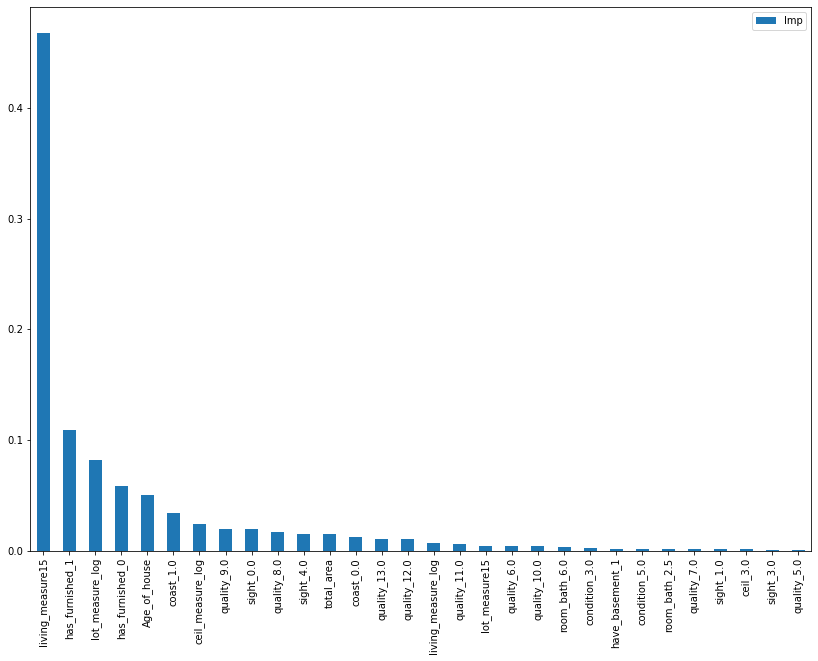

In [216]:
gbr_imp_feature_1= pd.DataFrame(gbr_model_final.feature_importances_, columns=['Imp'], index= X1.columns)
gbr_imp_feature_1.sort_values(by='Imp', ascending=False)
gbr_imp_feature_1['Imp']=gbr_imp_feature_1['Imp'].map('{0:.5f}'.format)
gbr_imp_feature_1=gbr_imp_feature_1.sort_values(by='Imp', ascending=False)
gbr_imp_feature_1.Imp=gbr_imp_feature_1.Imp.astype('float')

gbr_imp_feature_1[:30].plot.bar(figsize=(14, 10))

print("Feature Importance first 20:\t",(gbr_imp_feature_1[:20].sum())*100)
print("Feature Importance first 25:\t",(gbr_imp_feature_1[:25].sum())*100)
print("Feature Importance first 30:\t",(gbr_imp_feature_1[:30].sum())*100)


In [221]:
#Gradient boosting data with outliers
gbr_model_final2 = GradientBoostingRegressor(n_estimators=200, learning_rate= 0.1, max_depth=5, max_features='sqrt', min_samples_leaf=5, min_samples_split=50, subsample=1)


In [ ]:
'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 5, 
'max_features': 'sqrt', 'min_samples_leaf': 5, 
'min_samples_split': 50, 'n_estimators': 1000, 'subsample': 1


In [222]:
model_performance(gbr_model_final2, 'Gradient boosting2', 'with outliers', X_train0, X_test0, y_train0, y_test0)

Method:  Gradient boosting2
--------------------
Accuracy score of train data:  0.8348457015974824
Accuracy score of test data:  0.7646574253620553



Method                Data type                  r2_score  \
0    Linear Regression            With outliers                     0.689   
1    Linear Regression         Without outliers                     0.622   
2    Linear Regression  With log transformation                     0.685   
3    Linear Regression                   Scaled  -9497856600048187392.000   
4        KNN Regressor            with outliers                     0.521   
5        KNN Regressor         without outliers                     0.475   
6        KNN Regressor  With log transformation                     0.368   
7        KNN Regressor                   Scaled                     0.641   
8                  SVR            with outliers                    -0.060   
9                  SVR         without outliers                    -0.044   
10                 SVR  With log transformation                    -0.060   
11                 SVR                   Scaled                    -0.055   
12       Decision tree            with outliers                     0.508   
13       Decision tree         without outliers                     0.397   
14       Decision tree  With log transformation                     0.490   
15       Decision tree                   Scaled                     0.480   
16       Random forest            with outliers                     0.644   
17       Random forest         without outliers                     0.554   
18       Random forest  With log transformation                     0.645   
19       Random forest                   Scaled                     0.645   
20   Gradient boosting            with outliers                     0.755   
21   Gradient boosting         without outliers                     0.678   
22   Gradient boosting  With log transformation                     0.755   
23   Gradient boosting                   Scaled                     0.756   
24    Lasso Regression            with outliers                     0.688   
25    Lasso Regression         without outliers                     0.622   
26    Lasso Regression  With log transformation                     0.684   
27    Lasso Regression                   Scaled                     0.688   
28    Ridge Regression            with outliers                     0.690   
29    Ridge Regression         without outliers                     0.623   
30    Ridge Regression  With log transformation                     0.686   
31    Ridge Regression                   Scaled                     0.688   
32  Gradient boosting2            with outliers                     0.765   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05  
20                      32459473940.383         1.206156e+05  
21         

In [223]:
#Gradient boosting without outliers
model_performance(gbr_model_final2, 'Gradient boosting2', 'without outliers', X_train, X_test, y_train, y_test)

Method:  Gradient boosting2
--------------------
Accuracy score of train data:  0.7686833143918362
Accuracy score of test data:  0.6853312611144478



Method                Data type                  r2_score  \
0    Linear Regression            With outliers                     0.689   
1    Linear Regression         Without outliers                     0.622   
2    Linear Regression  With log transformation                     0.685   
3    Linear Regression                   Scaled  -9497856600048187392.000   
4        KNN Regressor            with outliers                     0.521   
5        KNN Regressor         without outliers                     0.475   
6        KNN Regressor  With log transformation                     0.368   
7        KNN Regressor                   Scaled                     0.641   
8                  SVR            with outliers                    -0.060   
9                  SVR         without outliers                    -0.044   
10                 SVR  With log transformation                    -0.060   
11                 SVR                   Scaled                    -0.055   
12       Decision tree            with outliers                     0.508   
13       Decision tree         without outliers                     0.397   
14       Decision tree  With log transformation                     0.490   
15       Decision tree                   Scaled                     0.480   
16       Random forest            with outliers                     0.644   
17       Random forest         without outliers                     0.554   
18       Random forest  With log transformation                     0.645   
19       Random forest                   Scaled                     0.645   
20   Gradient boosting            with outliers                     0.755   
21   Gradient boosting         without outliers                     0.678   
22   Gradient boosting  With log transformation                     0.755   
23   Gradient boosting                   Scaled                     0.756   
24    Lasso Regression            with outliers                     0.688   
25    Lasso Regression         without outliers                     0.622   
26    Lasso Regression  With log transformation                     0.684   
27    Lasso Regression                   Scaled                     0.688   
28    Ridge Regression            with outliers                     0.690   
29    Ridge Regression         without outliers                     0.623   
30    Ridge Regression  With log transformation                     0.686   
31    Ridge Regression                   Scaled                     0.688   
32  Gradient boosting2            with outliers                     0.765   
33  Gradient boosting2         without outliers                     0.685   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472         1.416881e+05  
19                      47157846957.072         1.417136e+05

In [224]:
# Gradient boosting for data with log transformation

model_performance(gbr_model_final2, 'Gradient boosting2', 'With log transformation', X_train1, X_test1, y_train1, y_test1)

Method:  Gradient boosting2
--------------------
Accuracy score of train data:  0.8350331004684939
Accuracy score of test data:  0.7681377812089605



Method                Data type                  r2_score  \
0    Linear Regression            With outliers                     0.689   
1    Linear Regression         Without outliers                     0.622   
2    Linear Regression  With log transformation                     0.685   
3    Linear Regression                   Scaled  -9497856600048187392.000   
4        KNN Regressor            with outliers                     0.521   
5        KNN Regressor         without outliers                     0.475   
6        KNN Regressor  With log transformation                     0.368   
7        KNN Regressor                   Scaled                     0.641   
8                  SVR            with outliers                    -0.060   
9                  SVR         without outliers                    -0.044   
10                 SVR  With log transformation                    -0.060   
11                 SVR                   Scaled                    -0.055   
12       Decision tree            with outliers                     0.508   
13       Decision tree         without outliers                     0.397   
14       Decision tree  With log transformation                     0.490   
15       Decision tree                   Scaled                     0.480   
16       Random forest            with outliers                     0.644   
17       Random forest         without outliers                     0.554   
18       Random forest  With log transformation                     0.645   
19       Random forest                   Scaled                     0.645   
20   Gradient boosting            with outliers                     0.755   
21   Gradient boosting         without outliers                     0.678   
22   Gradient boosting  With log transformation                     0.755   
23   Gradient boosting                   Scaled                     0.756   
24    Lasso Regression            with outliers                     0.688   
25    Lasso Regression         without outliers                     0.622   
26    Lasso Regression  With log transformation                     0.684   
27    Lasso Regression                   Scaled                     0.688   
28    Ridge Regression            with outliers                     0.690   
29    Ridge Regression         without outliers                     0.623   
30    Ridge Regression  With log transformation                     0.686   
31    Ridge Regression                   Scaled                     0.688   
32  Gradient boosting2            with outliers                     0.765   
33  Gradient boosting2         without outliers                     0.685   
34  Gradient boosting2  With log transformation                     0.768   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055342.085         1.265799e+05  
18                      47145155540.472       

In [225]:
#Gradient boosting model for data with scaling:
model_performance(gbr_model_final2, 'Gradient boosting2', 'Scaled', X0_train_scaled, X0_test_scaled, y_train0, y_test0)

Method:  Gradient boosting2
--------------------
Accuracy score of train data:  0.8331376923061626
Accuracy score of test data:  0.7687173368829939



Method                Data type                  r2_score  \
0    Linear Regression            With outliers                     0.689   
1    Linear Regression         Without outliers                     0.622   
2    Linear Regression  With log transformation                     0.685   
3    Linear Regression                   Scaled  -9497856600048187392.000   
4        KNN Regressor            with outliers                     0.521   
5        KNN Regressor         without outliers                     0.475   
6        KNN Regressor  With log transformation                     0.368   
7        KNN Regressor                   Scaled                     0.641   
8                  SVR            with outliers                    -0.060   
9                  SVR         without outliers                    -0.044   
10                 SVR  With log transformation                    -0.060   
11                 SVR                   Scaled                    -0.055   
12       Decision tree            with outliers                     0.508   
13       Decision tree         without outliers                     0.397   
14       Decision tree  With log transformation                     0.490   
15       Decision tree                   Scaled                     0.480   
16       Random forest            with outliers                     0.644   
17       Random forest         without outliers                     0.554   
18       Random forest  With log transformation                     0.645   
19       Random forest                   Scaled                     0.645   
20   Gradient boosting            with outliers                     0.755   
21   Gradient boosting         without outliers                     0.678   
22   Gradient boosting  With log transformation                     0.755   
23   Gradient boosting                   Scaled                     0.756   
24    Lasso Regression            with outliers                     0.688   
25    Lasso Regression         without outliers                     0.622   
26    Lasso Regression  With log transformation                     0.684   
27    Lasso Regression                   Scaled                     0.688   
28    Ridge Regression            with outliers                     0.690   
29    Ridge Regression         without outliers                     0.623   
30    Ridge Regression  With log transformation                     0.686   
31    Ridge Regression                   Scaled                     0.688   
32  Gradient boosting2            with outliers                     0.765   
33  Gradient boosting2         without outliers                     0.685   
34  Gradient boosting2  With log transformation                     0.768   
35  Gradient boosting2                   Scaled                     0.769   

                     Mean_squared_error  Mean_absolute_error  
0                       41274295457.343         1.336806e+05  
1                       26168992379.763         1.139925e+05  
2                       41769874018.375         1.329624e+05  
3   1260518928048580256747264933888.000         1.966949e+13  
4                       63600386921.903         1.514864e+05  
5                       36394268383.577         1.317671e+05  
6                       83859619540.430         1.730901e+05  
7                       47596500914.609         1.306030e+05  
8                      140660718003.800         2.221589e+05  
9                       72346782343.691         1.842521e+05  
10                     140660669822.856         2.221588e+05  
11                     140016871040.929         2.216516e+05  
12                      65253670509.811         1.631886e+05  
13                      41804919302.256         1.457230e+05  
14                      67670656878.875         1.674833e+05  
15                      68992000401.897         1.643585e+05  
16                      47230552805.405         1.414254e+05  
17                      30862055

Feature Importance first 20:	 Imp    97.246
dtype: float64
Feature Importance first 25:	 Imp    98.358
dtype: float64
Feature Importance first 30:	 Imp    98.958
dtype: float64


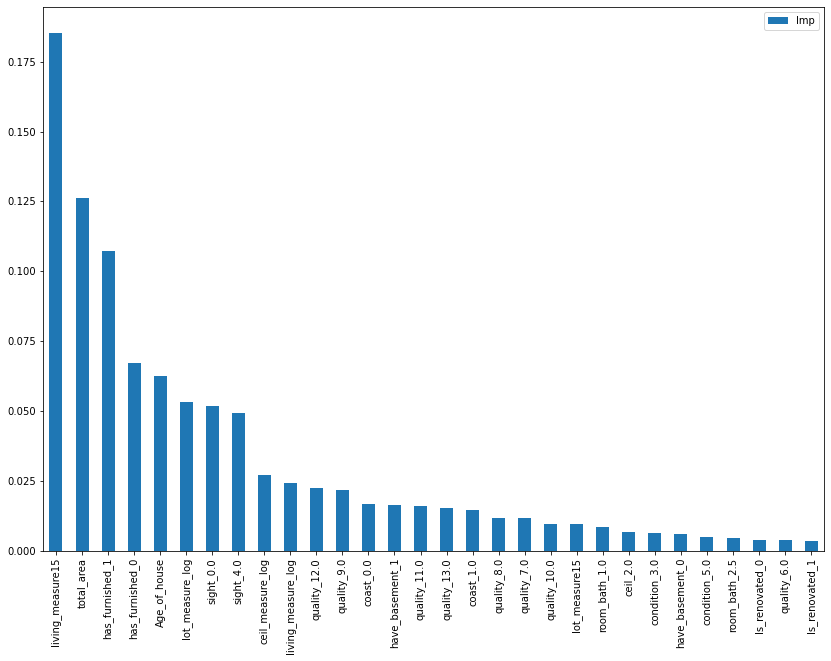

In [226]:
gbr_imp_feature_2= pd.DataFrame(gbr_model_final2.feature_importances_, columns=['Imp'], index= X1.columns)
gbr_imp_feature_2.sort_values(by='Imp', ascending=False)
gbr_imp_feature_2['Imp']=gbr_imp_feature_2['Imp'].map('{0:.5f}'.format)
gbr_imp_feature_2=gbr_imp_feature_2.sort_values(by='Imp', ascending=False)
gbr_imp_feature_2.Imp=gbr_imp_feature_2.Imp.astype('float')

gbr_imp_feature_2[:30].plot.bar(figsize=(14, 10))

print("Feature Importance first 20:\t",(gbr_imp_feature_1[:20].sum())*100)
print("Feature Importance first 25:\t",(gbr_imp_feature_1[:25].sum())*100)
print("Feature Importance first 30:\t",(gbr_imp_feature_1[:30].sum())*100)
